# AirBnb Analysis -> Capstone Project

_Author: Nevin Joshua Lyons_

## Problem Statements

1. Sentiment Analysis of Airbnb Guest Reviews for Listing Improvement
2. The goal of this data science project is to analyze and understand the dynamics of the Seattle Airbnb market, with a focus on identifying key trends and insights related to booking activity, rental prices, neighborhood ratings, accommodation availability, and accommodation types.

### Analytical Approach:
This project will employ a combination of descriptive and predictive analytics techniques to uncover patterns and make informed recommendations for both hosts and guests. Descriptive analytics will be used to summarize the current state of the Seattle Airbnb market, while predictive analytics will help forecast future trends and make data-driven decisions.

#### Specific Objectives:
>>-Identify the busiest time of the year for Airbnb bookings in Seattle and analyze how prices fluctuate during peak periods.
-Understand the distribution of rental prices across different locations in Seattle.
-Determine which neighborhoods have the highest average review scores and identify factors contributing to positive ratings.
-Analyze the availability of accommodations by neighborhood and identify areas with the highest number of listings.
-Investigate pricing trends across different neighborhoods to identify areas with the highest prices.
-Explore guest sentiment towards neighborhoods to identify areas perceived as "chill" or relaxed.
-Conduct sentiment analysis of guest reviews to understand overall sentiment towards different neighborhoods.
-Determine the most common types of accommodations used in Seattle and analyze their popularity among guests.

#### Conclusion
By addressing these objectives, this project aims to provide valuable insights into the Seattle Airbnb market, enabling hosts to optimize their listings and improve the guest experience, while also helping guests make more informed decisions when booking accommodations in Seattle.

## Questions i want answered

1. What is the busiest time of the year to visit Seattle? How do the prices change during that time?
2. What is the rent distribution of the listings in these locations?
3. Which neighborhoods have the highest rating review scores?
4. what is the highest no. of Accommodation by neighborhood?
5. Which neighborhoods have the highest prices?
6. chill neighbourhood
7. review based on location 
8. Which most type of Accommodation used in Seattle?
9. Analyse guest reviews 

---

>Basing my Capstone Project on the CRISP-DM model based on the Data Science Analytics Methodology. CRISP-DM stands for Cross-Industry Standard Process for Data Mining which is consisted of the following steps:
1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Data Modeling
5. Result Evaluation
6. Deployment

---


## Load packages

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import seaborn as sns
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import plotly as py
from plotly.offline import iplot, plot, init_notebook_mode, download_plotlyjs
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import plotly.offline as offline

# Import CountVectorizer and TFIDFVectorizer from feature_extraction.text.
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
lemmatizer = WordNetLemmatizer()
from sklearn.feature_extraction.text import CountVectorizer
%matplotlib inline
# this setting widens how many characters pandas will display in a column:
pd.options.display.max_colwidth = 400


import plotly as py
from plotly.offline import iplot, plot, init_notebook_mode, download_plotlyjs
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import plotly.offline as offline
import seaborn as sb

import seaborn as sns
import matplotlib.pyplot as plt


---

## Load data

In [4]:
calendar = pd.read_csv('calendar.csv')
listings = pd.read_csv('listings.csv')
reviews = pd.read_csv('reviews.csv')


In [5]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [6]:
calendar.isnull().sum()

listing_id         0
date               0
available          0
price         459028
dtype: int64

In [7]:
listings.head(1)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,"Make your self at home in this charming one-bedroom apartment, centrally-located on the west side of Queen Anne hill. This elegantly-decorated, completely private apartment (bottom unit of a duplex) has an open floor plan, bamboo floors, a fully equipped kitchen, a TV, DVD player, basic cable, and a very cozy bedroom with a queen-size bed. The unit sleeps up to four (two in the bedroom and ...","Make your self at home in this charming one-bedroom apartment, centrally-located on the west side of Queen Anne hill. This elegantly-decorated, completely private apartment (bottom unit of a duplex) has an open floor plan, bamboo floors, a fully equipped kitchen, a TV, DVD player, basic cable, and a very cozy bedroom with a queen-size bed. The unit sleeps up to four (two in the bedroom and ...",none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07


In [8]:
listings.isnull().sum()

id                                    0
listing_url                           0
scrape_id                             0
last_scraped                          0
name                                  0
                                   ... 
cancellation_policy                   0
require_guest_profile_picture         0
require_guest_phone_verification      0
calculated_host_listings_count        0
reviews_per_month                   627
Length: 92, dtype: int64

In [9]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [10]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to everything!
1,7202016,39087409,2015-07-20,32440555,Frank,"Kelly has a great room in a very central location. \r\nBeautiful building , architecture and a style that we really like. \r\nWe felt guite at home here and wish we had spent more time.\r\nWent for a walk and found Seattle Center with a major food festival in progress. What a treat.\r\nVisited the Space Needle and the Chihuly Glass exhibit. Then Pikes Place Market. WOW. Thanks for a great stay."
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighborhood. This is the kind of apartment I wish I had!\r\n\r\nDidn't really get to meet Kelly until I was on my out, but she was always readily available by phone. \r\n\r\nI believe the only ""issue"" (if you want to call it that) was finding a place to park, but I sincerely doubt its easy to park anywhere in a residential area after 5 pm on a Friday"
3,7202016,40813543,2015-08-02,33671805,George,"Close to Seattle Center and all it has to offer - ballet, theater, museum, Space Needle, restaurants of all ilk just blocks away, and the Metropolitan (probably the coolest grocer you'll ever find). Easy to find and Kelly was warm, welcoming, and really interesting to talk to."
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating in a great neighborhood. She has some great coffee and while I wasn't around much during my stay the time I spent interacting with her was very pleasant. \r\n\r\nThe apartment is in a great location and very close to the Seattle Center. The neighborhood itself has a lot of good food as well!


In [11]:
reviews.isnull().sum()


listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         18
dtype: int64

In [12]:
for data in [calendar,listings,reviews]:
    display(data.head())
    print(data.shape)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


(1393570, 4)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,"Make your self at home in this charming one-bedroom apartment, centrally-located on the west side of Queen Anne hill. This elegantly-decorated, completely private apartment (bottom unit of a duplex) has an open floor plan, bamboo floors, a fully equipped kitchen, a TV, DVD player, basic cable, and a very cozy bedroom with a queen-size bed. The unit sleeps up to four (two in the bedroom and ...","Make your self at home in this charming one-bedroom apartment, centrally-located on the west side of Queen Anne hill. This elegantly-decorated, completely private apartment (bottom unit of a duplex) has an open floor plan, bamboo floors, a fully equipped kitchen, a TV, DVD player, basic cable, and a very cozy bedroom with a queen-size bed. The unit sleeps up to four (two in the bedroom and ...",none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,"Chemically sensitive? We've removed the irritants triggering allergy or asthma attacks, like carpeting, forced air & used pillows, all culprits that harbor fungus, mold & bacteria. No smoking, no pets. Designed for healthy living, so breathe easy.","Beautiful, hypoallergenic apartment in an extremely safe, quiet and pedestrian-friendly section of Queen Anne. A leafy-green location that puts the best of Seattle at your doorstep. Free WiFi, free parking, ...even free pillows! What's special about this place? Hypo-allergenic bedding, mattresses/covers and new pillows with each rental. (So feel free to take your new pillows with you!) A be...","Chemically sensitive? We've removed the irritants triggering allergy or asthma attacks, like carpeting, forced air & used pillows, all culprits that harbor fungus, mold & bacteria. No smoking, no pets. Designed for healthy living, so breathe easy. Beautiful, hypoallergenic apartment in an extremely safe, quiet and pedestrian-friendly section of Queen Anne. A leafy-green location that puts t...",none,"Queen Anne is a wonderful, truly functional village. You can walk everywhere... for coffee, for groceries, for a night out, for breathtaking views of the Puget Sound.",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,"New modern house built in 2013. Spectacular sunset/water views and light, rooftop deck and lounge area, hot tub, 5 bedrooms, gourmet kitchen. Perfect for 2-3 families, walk to downtown. Located in highly desirable Queen Anne neighborhood.","Our house is modern, light and fresh with a warm simple palette accented with barnwood, steel and concrete. Open living spaces for entertaining, gourmet kitchen, deck off the kitchen, reading nook, half bath and smaller tv room off kitchen. Fireplace with sofa and sitting area. Basement room is great for kids...this room has patio access and a garage door that opens into the space with baske...","New modern house built in 2013. Spectacular sunset/water views and light, rooftop deck and lounge area, hot tub, 5 bedrooms, gourmet kitchen. Perfect for 2-3 families, walk to downtown. Located in highly desirable Queen Anne neighborhood. Our house is modern, light and fresh with a warm simple palette accented with barnwood, steel and concrete. Open living spaces for entertaining, gourmet ...",none,"Upper Queen Anne is a charming neighborhood full of a mix of beautifully maintained, turn-of-the-century craftsman homes, tudors and modern homes. The ""main drag"" is Queen Anne Ave. 

(3818, 92)


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to everything!
1,7202016,39087409,2015-07-20,32440555,Frank,"Kelly has a great room in a very central location. \r\nBeautiful building , architecture and a style that we really like. \r\nWe felt guite at home here and wish we had spent more time.\r\nWent for a walk and found Seattle Center with a major food festival in progress. What a treat.\r\nVisited the Space Needle and the Chihuly Glass exhibit. Then Pikes Place Market. WOW. Thanks for a great stay."
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighborhood. This is the kind of apartment I wish I had!\r\n\r\nDidn't really get to meet Kelly until I was on my out, but she was always readily available by phone. \r\n\r\nI believe the only ""issue"" (if you want to call it that) was finding a place to park, but I sincerely doubt its easy to park anywhere in a residential area after 5 pm on a Friday"
3,7202016,40813543,2015-08-02,33671805,George,"Close to Seattle Center and all it has to offer - ballet, theater, museum, Space Needle, restaurants of all ilk just blocks away, and the Metropolitan (probably the coolest grocer you'll ever find). Easy to find and Kelly was warm, welcoming, and really interesting to talk to."
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating in a great neighborhood. She has some great coffee and while I wasn't around much during my stay the time I spent interacting with her was very pleasant. \r\n\r\nThe apartment is in a great location and very close to the Seattle Center. The neighborhood itself has a lot of good food as well!


(84849, 6)


>After reviewing the official data assumption document, I gained a better understanding of the dataset and identified the features I will use to answer the business questions.

>The calendar data records the price and availability of each property listing for the next 365 days. Since it reflects each host's future housing plans, I won't be using this data in my analysis.

>The listings data primarily describes the attributes of each property listing. I found that the feature "_host_issuperhost" is the indicator of a superhost, which will help me answer Q1.

>The reviews dataset contains reviews left by customers. For each review, I can find the date and the corresponding listing property. Using this timeline data, I can answer Q3, which involves examining the development of Airbnb over the years.

# Step 2: Cleaning the data Types of data need to clean:

- Missing Values
- Data Type Conversion
- Inconsistent Formatting
- Duplicate Data
- Inaccurate Data

In [13]:
print(calendar.head(10))
print(calendar.isnull().sum())


   listing_id        date available   price
0      241032  2016-01-04         t  $85.00
1      241032  2016-01-05         t  $85.00
2      241032  2016-01-06         f     NaN
3      241032  2016-01-07         f     NaN
4      241032  2016-01-08         f     NaN
5      241032  2016-01-09         f     NaN
6      241032  2016-01-10         f     NaN
7      241032  2016-01-11         f     NaN
8      241032  2016-01-12         f     NaN
9      241032  2016-01-13         t  $85.00
listing_id         0
date               0
available          0
price         459028
dtype: int64


In [14]:
#Here i will be removing the NaN Values, and also to make the data more simply i will operate in the form without the $ symbol

# removing the NaN values
calendar.dropna(inplace=True)

# removing the $ sign
calendar['price'] = calendar['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Now we see what the new display of the modified dataset
print(calendar.head())

    listing_id        date available  price
0       241032  2016-01-04         t   85.0
1       241032  2016-01-05         t   85.0
9       241032  2016-01-13         t   85.0
10      241032  2016-01-14         t   85.0
14      241032  2016-01-18         t   85.0


In [15]:
calendar.isnull().sum()

listing_id    0
date          0
available     0
price         0
dtype: int64

In [16]:
# Here is the new data that will be saved as a new file name Calender
calendar.to_csv('Calender.csv', index=False)

# Step 3: Analysing the Data:


In [17]:
# 1. i will be analysing the pricing trends 

In [18]:
# Over Here converted the 'date' column to datetime format
calendar['date'] = pd.to_datetime(calendar['date'])

In [19]:
# Extract month and year from the 'date' column
calendar['month'] = calendar['date'].dt.month
calendar['year'] = calendar['date'].dt.year

# Calculate the average price per night for each month
average_price_per_month = calendar.groupby(['year', 'month'])['price'].mean()

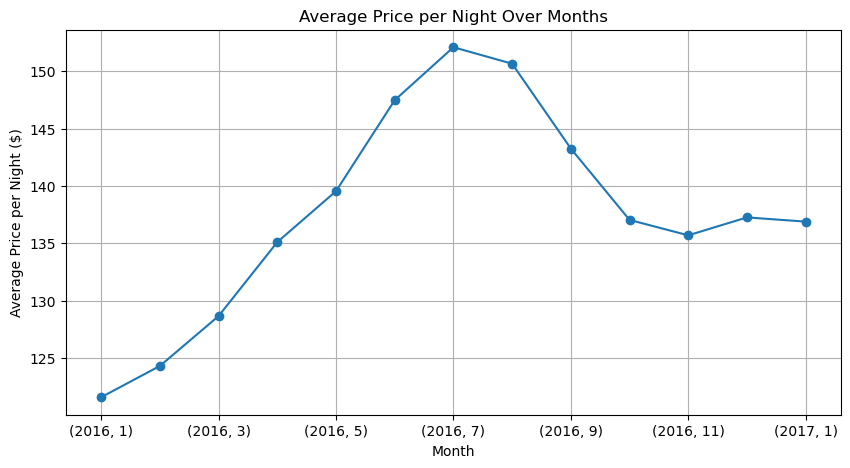

In [20]:
# Plotting
plt.figure(figsize=(10, 5))
average_price_per_month.plot(marker='o', linestyle='-')
plt.title('Average Price per Night Over Months')
plt.xlabel('Month')
plt.ylabel('Average Price per Night ($)')
plt.grid(True)
plt.show()

2. Popular Neighborhoods


The neighborhood name is embedded within a longer description in the "neighborhood" column, and neighborhood information varies in each row and is not consistently positioned at the beginning or end of the description. A way to approach this creating a dictionary that contains all the popular neighborhoods and check for their presnece in each row.

In [21]:
# List of known neighborhoods
known_neighborhoods = ['Queen Anne', 'Capitol Hill', 'Ballard', 'Fremont', 'West Seattle','Downtown',
                      'Beacon Hill', 'Central District', 'Belltown', 'Montlake', 'Mount Bake', 'Wallingford',
                      'Green Lake', 'Madrona', 'Madison', 'University District', 'South Lake', 'Eastlake']

In [22]:
# Function to find the neighborhood in the description
def find_neighborhood(description):
    if pd.notna(description):
        for neighborhood in known_neighborhoods:
            if neighborhood.lower() in description.lower():
                return neighborhood
    
# Apply the function to create a new 'Neighborhood' column
listings['Neighborhood'] = listings['neighbourhood'].apply(find_neighborhood)

# Count the number of listings in each neighborhood
neighborhood_counts = listings['Neighborhood'].value_counts().reset_index()

# Rename the columns for clarity
neighborhood_counts.columns = ['Neighborhood', 'Number of Listings']

# Sort the neighborhoods by the number of listings in descending order
neighborhood_counts = neighborhood_counts.sort_values(by='Number of Listings', ascending=False)

# Display the distribution of listings across neighborhoods
print(neighborhood_counts)

           Neighborhood  Number of Listings
0          Capitol Hill                 351
1            Queen Anne                 270
2               Ballard                 213
3              Belltown                 204
4               Fremont                 148
5           Wallingford                 143
6   University District                 107
7           Beacon Hill                  97
8            Green Lake                  52
9            Mount Bake                  46
10             Eastlake                  41
11              Madrona                  40
12           South Lake                  21
13             Montlake                  19
14              Madison                  16


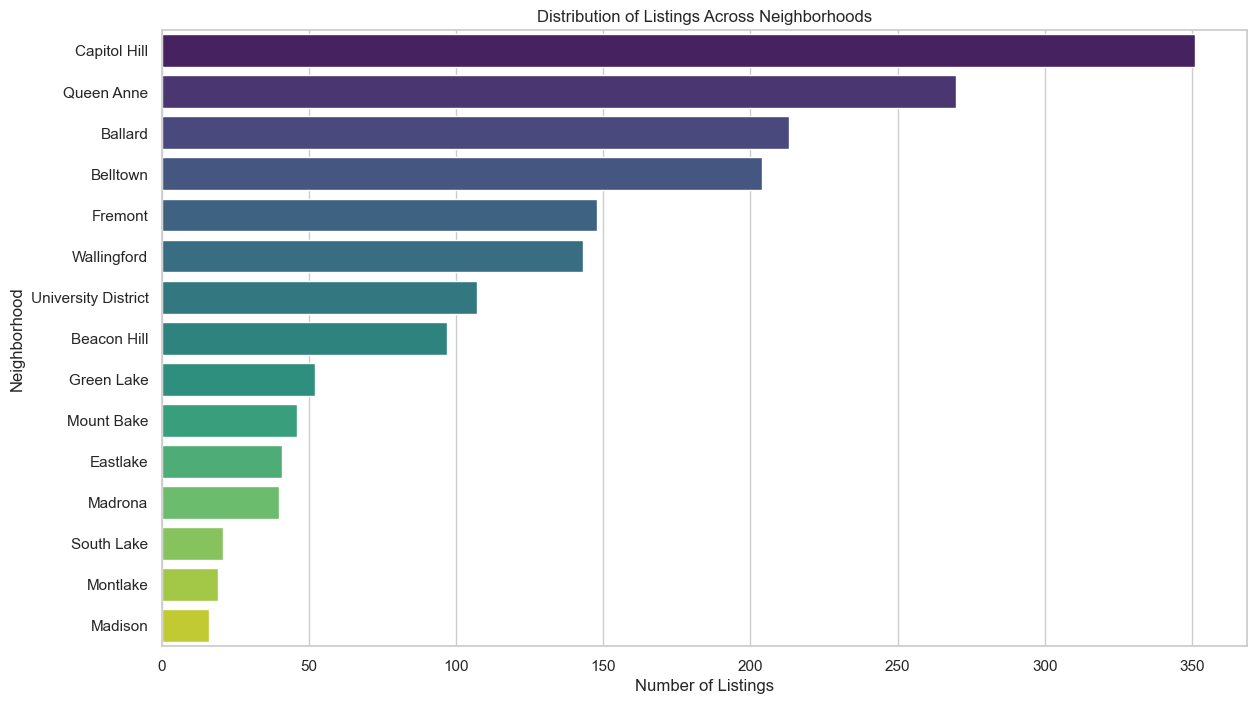

In [23]:
# Create Graph
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))
sns.barplot(x='Number of Listings', y='Neighborhood', data=neighborhood_counts, palette='viridis')
plt.title('Distribution of Listings Across Neighborhoods')
plt.xlabel('Number of Listings')
plt.ylabel('Neighborhood')
plt.show()

3. Review Sentiment Analysis

In [25]:
# Convert 'comments' column to strings to handle NaN values
reviews['comments'] = reviews['comments'].astype(str)

# Fumction to get sentiment polarity
def get_sentiment(comment):

# Apply sentiment function to each comment
reviews['Sentiment'] = reviews['comments'].apply(get_sentiment)

# Categorize reviews as positive, negative, or neutral
reviews['Sentiment_Catagory'] = reviews['Sentiment'].apply(lambda x: 'Positive' if x > 0 else 'Negative' if x < 0
                                                        else 'Neutral')
# Plotting
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment_Catagory', data=review, palette='Set2')
plt.title('Distribution of Sentiments in Reviews')
plt.xlabel('Sentiment Category')
plt.ylabel('Number of Reviews')
plt.show()

# Display the percentage of positive and negative sentiments
sentiment_percentage = review['Sentiment_Catagory'].value_counts(normalize=True) * 100
print(sentiment_percentage)

IndentationError: expected an indented block after function definition on line 5 (3322187011.py, line 8)

In [26]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download NLTK resources if not already downloaded
nltk.download('vader_lexicon')

# Instantiate SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Function to get sentiment polarity



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [27]:
def get_sentiment(comment):
    # Get polarity scores using NLTK's SentimentIntensityAnalyzer
    scores = sid.polarity_scores(comment)
    # Return compound score (overall sentiment)
    return scores['compound']

# Apply sentiment function to each comment
reviews['Sentiment'] = reviews['comments'].apply(get_sentiment)

# Categorize reviews as positive, negative, or neutral
reviews['Sentiment_Category'] = reviews['Sentiment'].apply(lambda x: 'Positive' if x > 0 else 'Negative' if x < 0
                                                        else 'Neutral')

# Plotting
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment_Category', data=reviews, palette='Set2')
plt.title('Distribution of Sentiments in Reviews')
plt.xlabel('Sentiment Category')
plt.ylabel('Number of Reviews')
plt.show()

# Display the percentage of positive and negative sentiments
sentiment_percentage = reviews['Sentiment_Category'].value_counts(normalize=True) * 100
print(sentiment_percentage)

AttributeError: 'float' object has no attribute 'encode'

In [28]:
cols = ['number_of_reviews', 'first_review', 'last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 
       'review_scores_location', 'review_scores_value', 'reviews_per_month']
listings[cols].describe()

,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
count,3818.000000,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,3191.000000
mean,22.223415,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,2.078919
std,37.730892,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,1.822348
min,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,0.020000
25%,2.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,0.695000
50%,9.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.540000
75%,26.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,3.000000
max,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,12.150000


<Axes: >

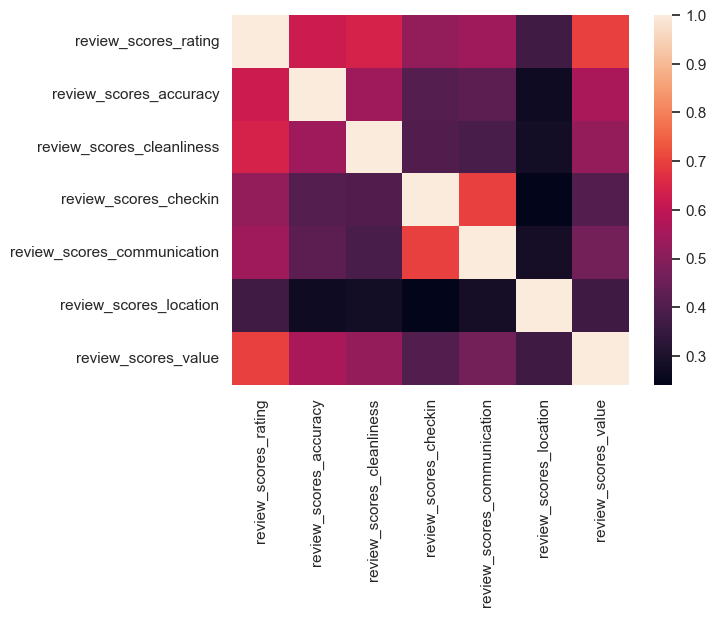

In [29]:
cols = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 
        'review_scores_communication', 'review_scores_location', 'review_scores_value']
df = listings[cols]

import seaborn as sns
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

<Axes: >

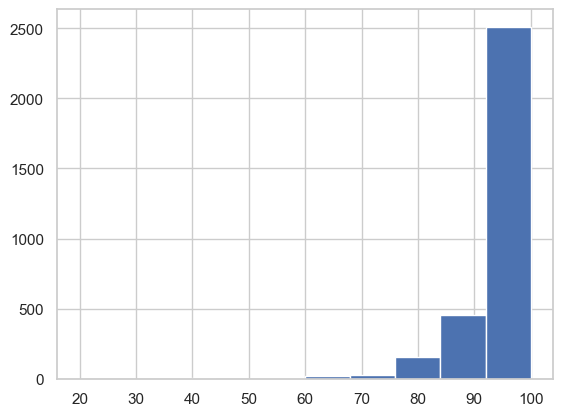

In [30]:
listings['review_scores_rating'].hist()


array([[<Axes: title={'center': 'number_of_reviews'}>,
        <Axes: title={'center': 'reviews_per_month'}>]], dtype=object)

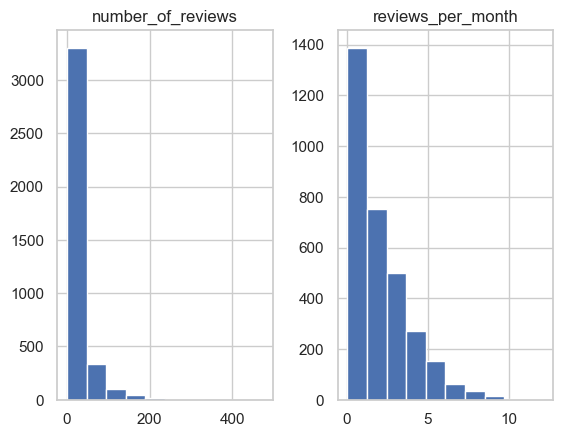

In [31]:
listings[['number_of_reviews', 'reviews_per_month']].hist()

The remainder of the data understanding will largely be attributed towards understanding our second data mining goal, which is to assess how listing attributes are linked with the customer experiences. We will continue through the feature groups, with this sub-section studying the property attribute features.

In [32]:
cols = ['property_type', 'room_type', 'accommodates', 'bathrooms', 'beds', 'bed_type', 'amenities', 'square_feet']
listings[cols].head()

,property_type,room_type,accommodates,bathrooms,beds,bed_type,amenities,square_feet
0,Apartment,Entire home/apt,4,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""Air Conditioning"",Kitchen,Heating,""Family/Kid Friendly"",Washer,Dryer}",NaN
1,Apartment,Entire home/apt,4,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free Parking on Premises"",""Buzzer/Wireless Intercom"",Heating,""Family/Kid Friendly"",Washer,Dryer,""Smoke Detector"",""Carbon Monoxide Detector"",""First Aid Kit"",""Safety Card"",""Fire Extinguisher"",Essentials}",NaN
2,House,Entire home/apt,11,4.5,7.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""Air Conditioning"",Kitchen,""Free Parking on Premises"",""Pets Allowed"",""Pets live on this property"",Dog(s),Cat(s),""Hot Tub"",""Indoor Fireplace"",Heating,""Family/Kid Friendly"",Washer,Dryer,""Smoke Detector"",""Carbon Monoxide Detector"",Essentials,Shampoo}",NaN
3,Apartment,Entire home/apt,3,1.0,2.0,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Indoor Fireplace"",Heating,""Family/Kid Friendly"",Washer,Dryer,""Smoke Detector"",""Carbon Monoxide Detector"",""Safety Card"",""Fire Extinguisher"",Essentials,Shampoo}",NaN
4,House,Entire home/apt,6,2.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Kitchen,Heating,""Family/Kid Friendly"",""Smoke Detector"",""Carbon Monoxide Detector"",""First Aid Kit"",""Fire Extinguisher"",Essentials,Shampoo}",NaN


C:\Users\ASUS\AppData\Local\Temp\ipykernel_12132\2807820640.py:3: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared.



array([[<Axes: title={'center': 'accommodates'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'beds'}>,
        <Axes: title={'center': 'square_feet'}>]], dtype=object)

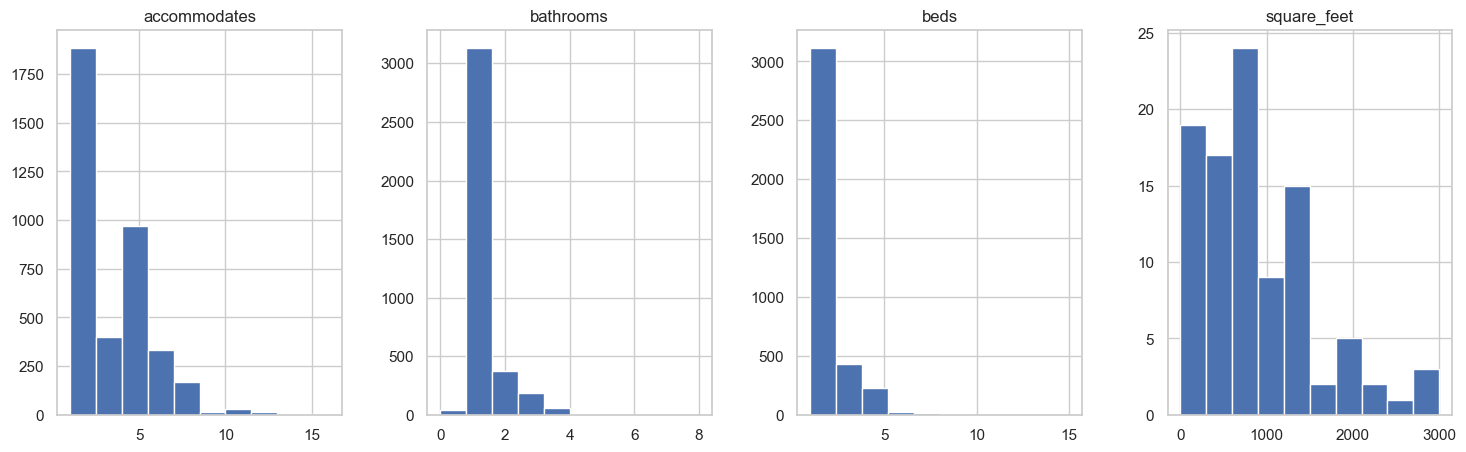

In [33]:
fig = plt.figure(figsize = (18,5))
ax = fig.gca()
listings[cols].hist(layout=(1,4), ax=ax)

From the above data, we can see that the median sits at 1 bed and one bathroom, accomodating 3 people. The vast majority of listings have just 1 bathroom, and 1-2 beds

In [34]:
reviews.dtypes.value_counts()

int64     3
object    3
Name: count, dtype: int64

In [35]:
calendar.dtypes.value_counts()

int32             2
int64             1
datetime64[ns]    1
object            1
float64           1
Name: count, dtype: int64

In [36]:
listings.dtypes.value_counts()

object     63
float64    17
int64      13
Name: count, dtype: int64

### Time Series

In [37]:
# Extract year and month from date feature
reviews.date= pd.to_datetime(reviews.date)
reviews['year'] = reviews.date.dt.year
reviews['month'] = reviews.date.dt.month
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,year,month
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to everything!,2015,7
1,7202016,39087409,2015-07-20,32440555,Frank,"Kelly has a great room in a very central location. \r\nBeautiful building , architecture and a style that we really like. \r\nWe felt guite at home here and wish we had spent more time.\r\nWent for a walk and found Seattle Center with a major food festival in progress. What a treat.\r\nVisited the Space Needle and the Chihuly Glass exhibit. Then Pikes Place Market. WOW. Thanks for a great stay.",2015,7
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighborhood. This is the kind of apartment I wish I had!\r\n\r\nDidn't really get to meet Kelly until I was on my out, but she was always readily available by phone. \r\n\r\nI believe the only ""issue"" (if you want to call it that) was finding a place to park, but I sincerely doubt its easy to park anywhere in a residential area after 5 pm on a Friday",2015,7
3,7202016,40813543,2015-08-02,33671805,George,"Close to Seattle Center and all it has to offer - ballet, theater, museum, Space Needle, restaurants of all ilk just blocks away, and the Metropolitan (probably the coolest grocer you'll ever find). Easy to find and Kelly was warm, welcoming, and really interesting to talk to.",2015,8
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating in a great neighborhood. She has some great coffee and while I wasn't around much during my stay the time I spent interacting with her was very pleasant. \r\n\r\nThe apartment is in a great location and very close to the Seattle Center. The neighborhood itself has a lot of good food as well!,2015,8


In [38]:
calendar2 = calendar.set_index("date")
calendar2.index = pd.to_datetime(calendar2.index)
calendar2 = calendar2[['price']].resample('M').mean()
calendar2.head()

,price
date,
2016-01-31,121.568409
2016-02-29,124.293927
2016-03-31,128.644488
2016-04-30,135.097005
2016-05-31,139.538183


In [39]:
#have your calendar or event date
#in this tutorial I use US Federal Holidays Date

df_holiday = pd.read_csv('usholidays.csv')
df_holiday['Date'] = pd.to_datetime(df_holiday["Date"]).dt.strftime('%Y-%m-%d')
df_holiday[['ds', 'holiday']] = df_holiday[['Date', 'Holiday']]
df_holiday = df_holiday[['ds', 'holiday']]
df_holiday.head()

,ds,holiday
0,2010-12-31,New Year's Day
1,2011-01-17,"Birthday of Martin Luther King, Jr."
2,2011-02-21,Washington's Birthday
3,2011-05-30,Memorial Day
4,2011-07-04,Independence Day


In [40]:
#copy the dataframe to your predefined dataframe
#copy only the column that you will use
calendar2 = calendar2
calendar2['date'] = calendar2.index
calendar2 = calendar2[['date', 'price']]
calendar2.columns = ['ds', 'y']
calendar2.head()

,ds,y
date,,
2016-01-31,2016-01-31,121.568409
2016-02-29,2016-02-29,124.293927
2016-03-31,2016-03-31,128.644488
2016-04-30,2016-04-30,135.097005
2016-05-31,2016-05-31,139.538183


In [41]:
#saved original data before it's log-transformed
calendar2['y_origin'] = calendar2['y']

#applied log transformation
calendar2['y'] = np.log(calendar2['y'])

#convert ds to datetime type
calendar2['ds'] =  pd.to_datetime(calendar2['ds'])
calendar2.head()

,ds,y,y_origin
date,,,
2016-01-31,2016-01-31,4.800477,121.568409
2016-02-29,2016-02-29,4.822649,124.293927
2016-03-31,2016-03-31,4.857053,128.644488
2016-04-30,2016-04-30,4.905993,135.097005
2016-05-31,2016-05-31,4.938338,139.538183


In [42]:
# #plot the trends
# py.iplot([go.Scatter(
#     x=calendar2.ds,
#     y=calendar2.y_origin
# )])

import plotly.graph_objects as go
import plotly.offline as py

# Create a scatter plot
scatter_plot = go.Scatter(x=calendar2['ds'], y=calendar2['y_origin'])

# Create the layout
layout = go.Layout(title='Trends Over Time')


### NLP 1

#### Cleanign the Data
Data Preprocessing (for listings)¶
Looking at the dataframe presented above, we can tell that there are some columns which are not useful to our analysis, there are also some values which are NaN. We will be:

Dropping columns that are irrelevant to our analysis
Filling NaN values with 0
Reformating numerical data if required
Filter out irrelevant rows

In [43]:
listing_data = listings[['id','name','summary','review_scores_rating','property_type','room_type','reviews_per_month','number_of_reviews','price']]
listing_data.head()

,id,name,summary,review_scores_rating,property_type,room_type,reviews_per_month,number_of_reviews,price
0,241032,Stylish Queen Anne Apartment,NaN,95.0,Apartment,Entire home/apt,4.07,207,$85.00
1,953595,Bright & Airy Queen Anne Apartment,"Chemically sensitive? We've removed the irritants triggering allergy or asthma attacks, like carpeting, forced air & used pillows, all culprits that harbor fungus, mold & bacteria. No smoking, no pets. Designed for healthy living, so breathe easy.",96.0,Apartment,Entire home/apt,1.48,43,$150.00
2,3308979,New Modern House-Amazing water view,"New modern house built in 2013. Spectacular sunset/water views and light, rooftop deck and lounge area, hot tub, 5 bedrooms, gourmet kitchen. Perfect for 2-3 families, walk to downtown. Located in highly desirable Queen Anne neighborhood.",97.0,House,Entire home/apt,1.15,20,$975.00
3,7421966,Queen Anne Chateau,"A charming apartment that sits atop Queen Anne hill, northwest facing bay windows with warm afternoon light setting over the Olympic Cascades. The space is perfect for one or two but can accommodate up to three on the fold-out memory foam cot.",NaN,Apartment,Entire home/apt,NaN,0,$100.00
4,278830,Charming craftsman 3 bdm house,"Cozy family craftman house in beautiful neighborhood of Queen Anne, Seattle, Washinton. 3 bedrooms, can accomodate up to 6 people. 1,200 sq. feet space is your oasis. Perfect location!",92.0,House,Entire home/apt,0.89,38,$450.00


In [44]:
# replacing NaN values with 0
listing_data.fillna(0, inplace=True)

#Extract the price column
price = listing_data["price"]
#Create an empty list to append the cleaned data to
prices = []
#clean the price data to make it a float
for p in price:
    # Removes the $ sign. Change the "," in the thousands
    p=float(p[1:].replace(',',''))
    # Add the clean data to the new list
    prices.append(p)
    
#Replace the old price with the cleaned data
listing_data["price"] = prices

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12132\4153244182.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12132\4153244182.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [45]:
#From here we can see that some of the numerical values are 0 (bathrooms,beds etc). 
#Since we will expect that an otherwise normal Airbnb to have these amenities, we will drop the rows where these values are 0.
listing_data.describe()

,id,review_scores_rating,reviews_per_month,number_of_reviews,price
count,3.818000e+03,3818.000000,3818.000000,3818.000000,3818.000000
mean,5.550111e+06,78.518596,1.737514,22.223415,127.976166
std,2.962660e+06,35.979061,1.835425,37.730892,90.250022
min,3.335000e+03,0.000000,0.000000,0.000000,20.000000
25%,3.258256e+06,87.000000,0.310000,2.000000,75.000000
50%,6.118244e+06,95.000000,1.105000,9.000000,100.000000
75%,8.035127e+06,98.000000,2.660000,26.000000,150.000000
max,1.034016e+07,100.000000,12.150000,474.000000,1000.000000


In [46]:
# Removing listings that have 0 values
listing_data = listing_data[listing_data.review_scores_rating >0]
listing_data = listing_data[listing_data.reviews_per_month >0]
listing_data = listing_data[listing_data.number_of_reviews >0]
listing_data.head()

,id,name,summary,review_scores_rating,property_type,room_type,reviews_per_month,number_of_reviews,price
0,241032,Stylish Queen Anne Apartment,0,95.0,Apartment,Entire home/apt,4.07,207,85.0
1,953595,Bright & Airy Queen Anne Apartment,"Chemically sensitive? We've removed the irritants triggering allergy or asthma attacks, like carpeting, forced air & used pillows, all culprits that harbor fungus, mold & bacteria. No smoking, no pets. Designed for healthy living, so breathe easy.",96.0,Apartment,Entire home/apt,1.48,43,150.0
2,3308979,New Modern House-Amazing water view,"New modern house built in 2013. Spectacular sunset/water views and light, rooftop deck and lounge area, hot tub, 5 bedrooms, gourmet kitchen. Perfect for 2-3 families, walk to downtown. Located in highly desirable Queen Anne neighborhood.",97.0,House,Entire home/apt,1.15,20,975.0
4,278830,Charming craftsman 3 bdm house,"Cozy family craftman house in beautiful neighborhood of Queen Anne, Seattle, Washinton. 3 bedrooms, can accomodate up to 6 people. 1,200 sq. feet space is your oasis. Perfect location!",92.0,House,Entire home/apt,0.89,38,450.0
5,5956968,Private unit in a 1920s mansion,"We're renting out a small private unit of one of Seattle's most beautiful houses to creative travelers. The unit has it's own entrance to give you privacy in a cozy room with a new bed, great view/light, antiques and a newly remodeled bathroom.",95.0,House,Private room,2.45,17,120.0


#### Exploratory Analysis (reviews)
For a review on a listing, we have identified that the two things that will affect the accuracy of a listing is the number of reviews on a listing, as well as the length of the review. We will be exploring the distribution of reviews based on these two factors

In [47]:
reviews_data= pd.read_csv('reviews.csv')

In [48]:
reviews_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


listing_id
208356     474
365550     466
25002      404
47196      353
63308      320
          ... 
8009814      1
7922663      1
7027507      1
8508223      1
9727246      1
Name: count, Length: 3191, dtype: int64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_12132\682377584.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='count', ylabel='Density'>

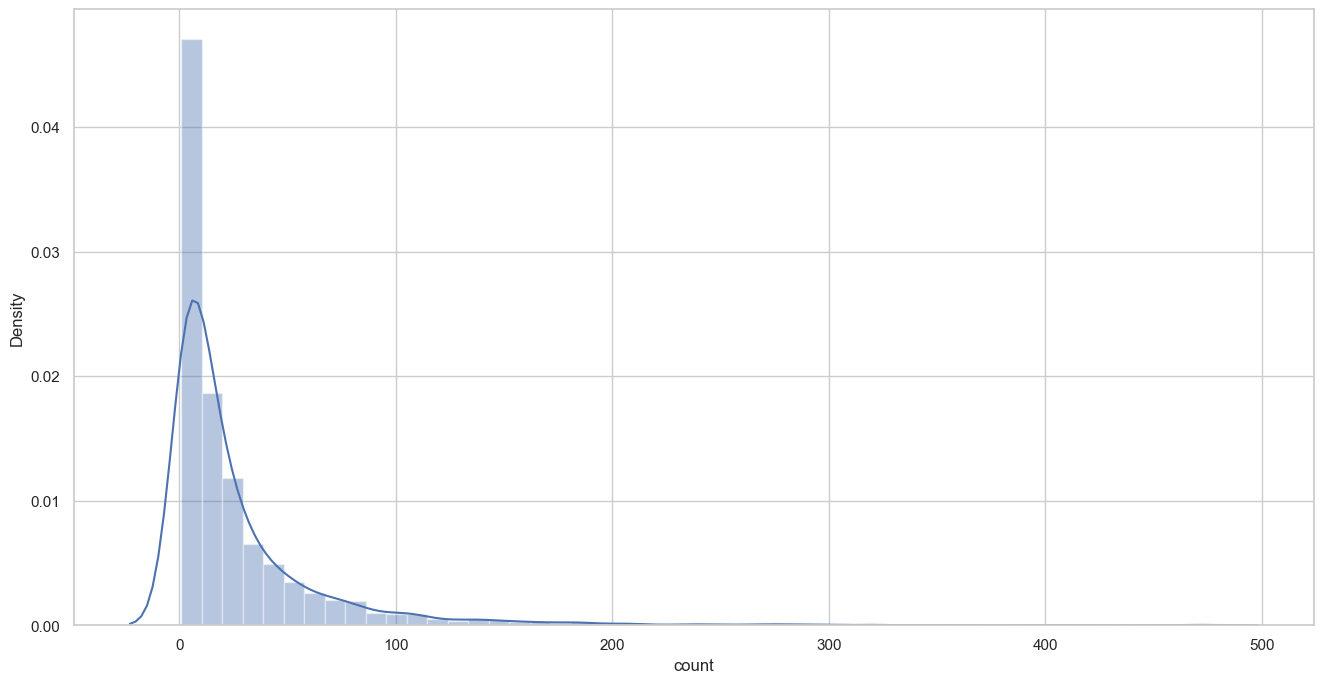

In [49]:
#Counting how many reviews are there per listing
f = plt.figure(figsize=(16, 8))
print(reviews_data["listing_id"].value_counts())
sb.distplot(reviews_data["listing_id"].value_counts())

From this table, we can tell that there are 474 listings with reviews, and the number of reviews ranges from 1 to 474. Since we are studying the relationship between reviews and the listing, listings with too little reviews will be removed.

In [50]:
# Counting the maximum amount of words in a review
max_len = reviews_data['comments'].str.split().str.len().max()
print('Maximum number of words in a review: ', max_len)

Maximum number of words in a review:  649.0


In [51]:
# Viewing the longest review
reviews_data[reviews_data['comments'].str.split().str.len() == 649]

,listing_id,id,date,reviewer_id,reviewer_name,comments
5816,107962,1168194,2012-04-23,1869876,Houston,CURLERS - this is the perfect location when you are competing at the Granite Curling Club (GCC.) The Heller Lake Log Cabin was not only in a better location than the local hotels but was cheaper and much nicer than the places our friends stayed this weekend. And for larger groups there is also a house for rental on the same property. \r\n\r\nWe flew into town for a Bonspiel (curling tournam...


In [52]:
#Viewing the longest review
reviews_data.iloc[5816,5]

"CURLERS - this is the perfect location when you are competing at the Granite Curling Club (GCC.)  The Heller Lake Log Cabin was not only in a better location than the local hotels but was cheaper and much nicer than the places our friends stayed this weekend.  And for larger groups there is also a house for rental on the same property.  \r\n\r\nWe flew into town for a Bonspiel (curling tournament) at the Granite Curling Club and this was the perfect location.  The club had a deal with some of the local hotels but when I looked into it they were 1) much farther away and 2) more expensive.  We were able to walk to GCC, which was only about three blocks away, while everyone else had to drive back and forth between the club and their hotel.  \r\n\r\nThe cabin is so nice and in such a great location for us that it makes the decision to return for future Bonspiels an easy one.  With there also being a house for rent on the same property we will likely have our whole team stay with us next t

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12132\2680046212.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: ylabel='Density'>

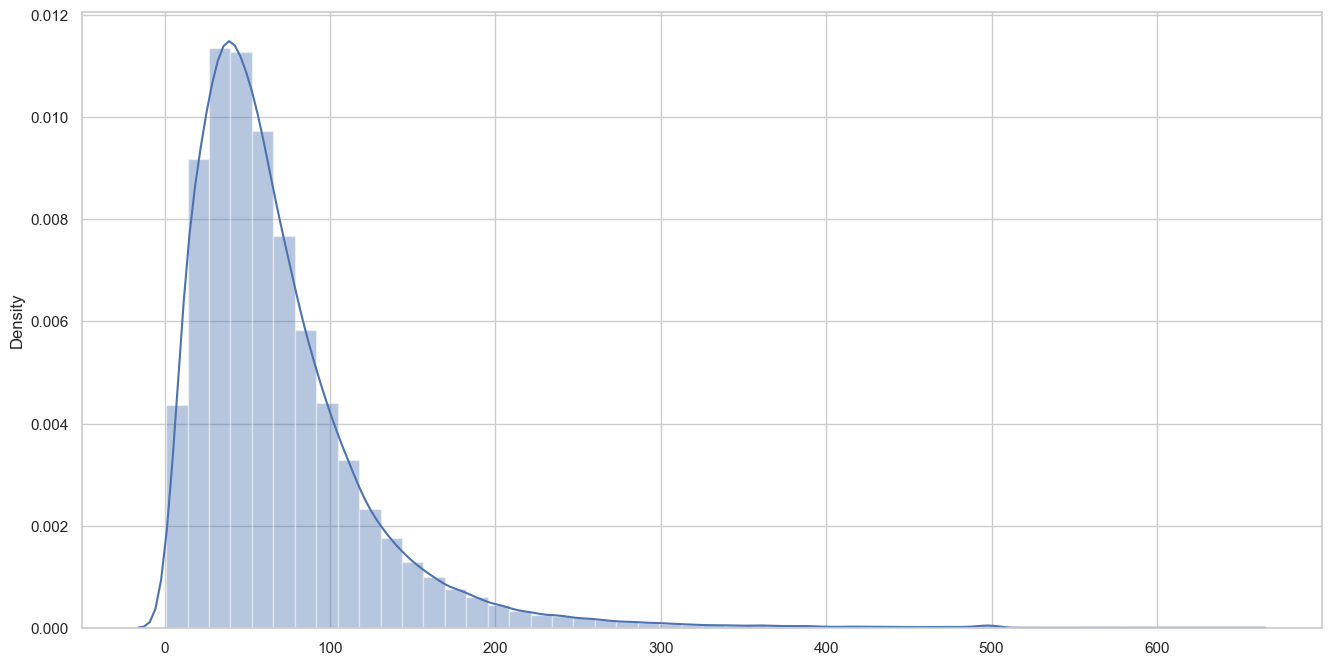

In [53]:
f = plt.figure(figsize=(16, 8))
sb.distplot(pd.DataFrame(reviews_data['comments'].str.split().str.len()))

From this plot, we can tell that most reviews ranges from 0-300 words. Reviews that are excessively long are difficult to estimate the sentiment as there will be a lot of irrelevant information and noise.

### Data Preprocessing (for reviews)
Before analysing the data, we will need to clean the data set in the following steps:

Remove listings that have too little reviews
Remove reviews that have too many words

In [54]:
reviews_data = reviews_data.dropna()
reviews_data.info

<bound method DataFrame.info of        listing_id        id        date  reviewer_id reviewer_name  \
0         7202016  38917982  2015-07-19     28943674        Bianca   
1         7202016  39087409  2015-07-20     32440555         Frank   
2         7202016  39820030  2015-07-26     37722850           Ian   
3         7202016  40813543  2015-08-02     33671805        George   
4         7202016  41986501  2015-08-10     34959538          Ming   
...           ...       ...         ...          ...           ...   
84844     3624990  50436321  2015-10-12     37419458          Ryan   
84845     3624990  51024875  2015-10-17      6933252         Linda   
84846     3624990  51511988  2015-10-20     19543701         Jaime   
84847     3624990  52814482  2015-11-02     24445024        Jørgen   
84848     9727246  56429621  2015-12-13     30860360     Stephanie   

                                                                                                                               

In [55]:
# Dropping comments which are more than 300 words
reviews_data = reviews_data[reviews_data['comments'].str.split().str.len() < 300]
reviews_data = reviews_data.dropna()
# Dropping listings that have less than 10 reviews
reviews_data = reviews_data[reviews_data.groupby('listing_id').listing_id.transform('count') > 10]
reviews_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78253 entries, 0 to 84847
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     78253 non-null  int64 
 1   id             78253 non-null  int64 
 2   date           78253 non-null  object
 3   reviewer_id    78253 non-null  int64 
 4   reviewer_name  78253 non-null  object
 5   comments       78253 non-null  object
dtypes: int64(3), object(3)
memory usage: 4.2+ MB


#### Sentiment Analysis on reviews using nltk
In this dataset, there are no numerical values to quantify how "good" or "bad" a review is. By performing sentiment analysis we will be able to see how positive or negative reviews affect prices

#### Applying nltk's Sentiment Intensity Analyzer model

In [56]:
# Import nltk libraries
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [57]:
# Create Analyzer object
sia = SentimentIntensityAnalyzer()
# Create empty rows in dataframe and set it to 0 first.
reviews_data['negative_score']=0.0
reviews_data['positive_score']=0.0
reviews_data['neutral_score']=0.0
reviews_data['compound_score']=0.0
# Define the function for sentiment analysis
def sentiment_analysis(index):
  # Equates the score given by the sentiment analysers
  reviews_data.at[index,'negative_score'] = sentiment['neg']
  reviews_data.at[index,'positive_score'] = sentiment['pos']
  reviews_data.at[index,'neutral_score']= sentiment['neu']
  reviews_data.at[index,'compound_score'] = sentiment['compound']

# Iterating through each review
for index,row in reviews_data.iterrows():
    # Assign the sentiment score array to a variable sentiment
    sentiment = sia.polarity_scores(row['comments'])
    # Calls the function defined above with the parameters
    sentiment_analysis(index)

reviews_data.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,negative_score,positive_score,neutral_score,compound_score
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to everything!,0.000,0.538,0.462,0.7901
1,7202016,39087409,2015-07-20,32440555,Frank,"Kelly has a great room in a very central location. \r\nBeautiful building , architecture and a style that we really like. \r\nWe felt guite at home here and wish we had spent more time.\r\nWent for a walk and found Seattle Center with a major food festival in progress. What a treat.\r\nVisited the Space Needle and the Chihuly Glass exhibit. Then Pikes Place Market. WOW. Thanks for a great stay.",0.000,0.391,0.609,0.9872
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighborhood. This is the kind of apartment I wish I had!\r\n\r\nDidn't really get to meet Kelly until I was on my out, but she was always readily available by phone. \r\n\r\nI believe the only ""issue"" (if you want to call it that) was finding a place to park, but I sincerely doubt its easy to park anywhere in a residential area after 5 pm on a Friday",0.043,0.185,0.772,0.8718
3,7202016,40813543,2015-08-02,33671805,George,"Close to Seattle Center and all it has to offer - ballet, theater, museum, Space Needle, restaurants of all ilk just blocks away, and the Metropolitan (probably the coolest grocer you'll ever find). Easy to find and Kelly was warm, welcoming, and really interesting to talk to.",0.035,0.200,0.765,0.8313
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating in a great neighborhood. She has some great coffee and while I wasn't around much during my stay the time I spent interacting with her was very pleasant. \r\n\r\nThe apartment is in a great location and very close to the Seattle Center. The neighborhood itself has a lot of good food as well!,0.000,0.345,0.655,0.9783


C:\Users\ASUS\AppData\Local\Temp\ipykernel_12132\2609757588.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\ASUS\AppData\Local\Temp\ipykernel_12132\2609757588.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\ASUS\AppData\Local\Temp\ipykernel_12132\2609757588.py:5: UserWarning:



`distplot` is a 

Text(0.5, 1.0, 'Distribution of Compound scores')

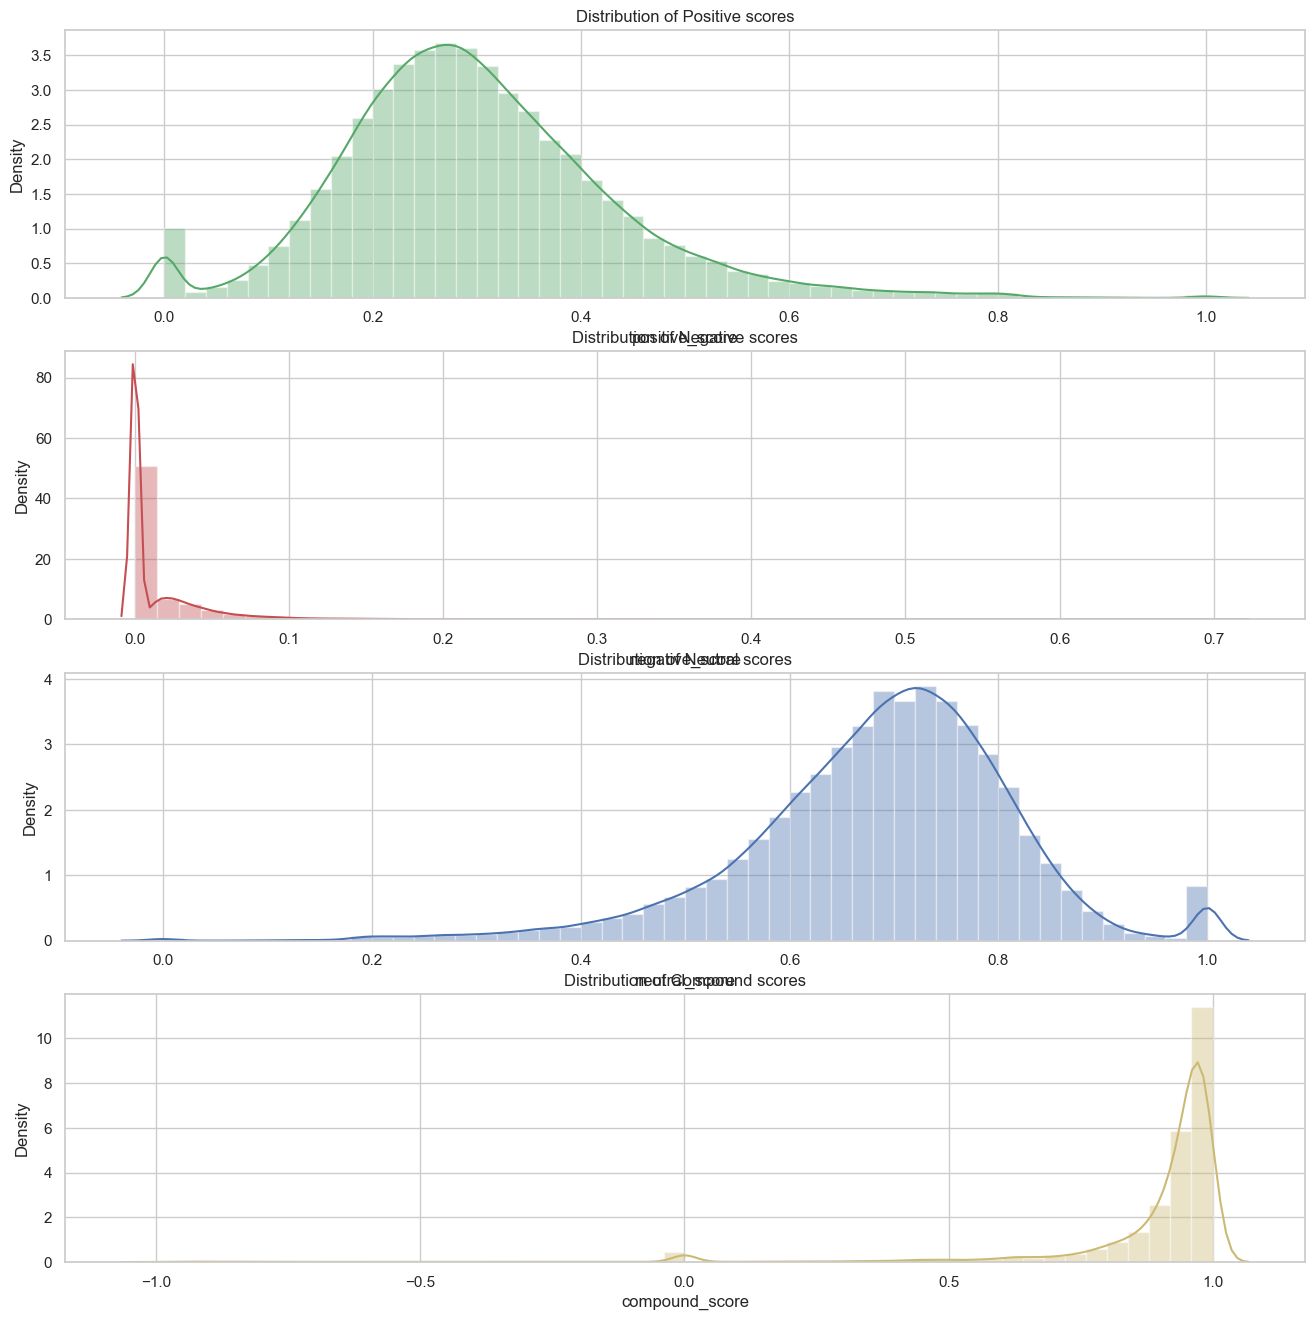

In [58]:
# Visualising the positive, negative, neutral and compound scores
f, axes = plt.subplots(4, 1, figsize=(16, 16))
sb.distplot(reviews_data["positive_score"],ax = axes[0], color = 'g').set_title("Distribution of Positive scores")
sb.distplot(reviews_data["negative_score"],ax = axes[1],color = 'r').set_title("Distribution of Negative scores")
sb.distplot(reviews_data["neutral_score"],ax = axes[2],color = 'b').set_title("Distribution of Neutral scores")
sb.distplot(reviews_data["compound_score"],ax = axes[3],color = 'y').set_title("Distribution of Compound scores")

From these plots, one thing that is very apparent is that there is very little comments with negative sentiments and a relatively evenly distributed score for neutral and positive sentiments. As a result, this causes the compound score to be largely skewed to the right. From this we can likely say that people most oftenly only leave comments which are positive in nature

#### Visualising common words using a wordcloud

In [59]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [60]:
# Importing libraries for wordcloud
from wordcloud import WordCloud, STOPWORDS
# Setting default stop words
stopwords = set(STOPWORDS)

words = ''.join(comments for comments in reviews_data['comments'])
#Creating a wordcloud
wordcloud = WordCloud(stopwords = stopwords, background_color="black").generate(words)

(-0.5, 399.5, 199.5, -0.5)

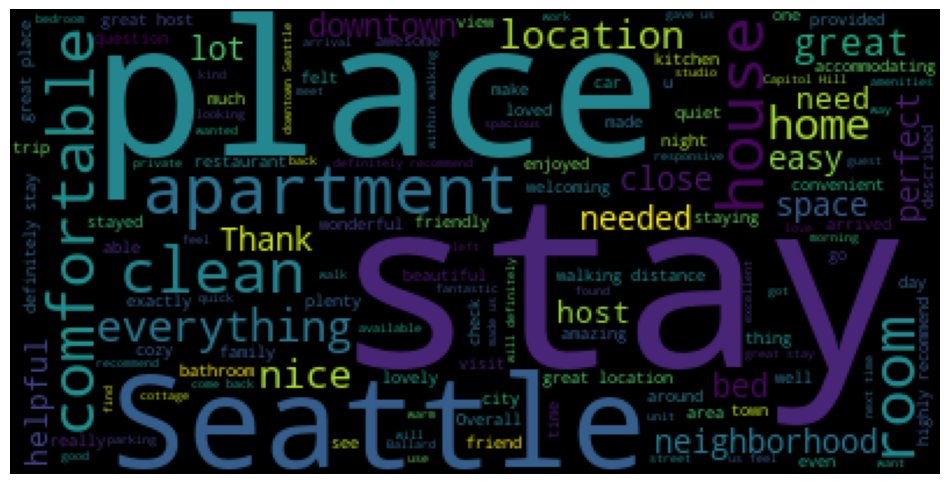

In [61]:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud)
plt.axis("off")

#### How does reviews affect pricing?
Now that we have gotten the compound score, we can plot the compound score against the price to study their relationship. We can also use the review_score_rating column in listing.csv to further understand the relationship between reviews and pricing

In [62]:
review_score = reviews_data[['listing_id','compound_score']]
review_score.head()

,listing_id,compound_score
0,7202016,0.7901
1,7202016,0.9872
2,7202016,0.8718
3,7202016,0.8313
4,7202016,0.9783


In [63]:
# Calculates the mean compound_score of each listing_id 
review_score_mean = review_score.groupby(['listing_id']).mean()
review_score_mean.head()

,compound_score
listing_id,
4291,0.778260
5682,0.887364
6606,0.913877
7369,0.904060
9419,0.900456


In [64]:
# Obtain price, review_scores_rating and id from listings_data
listing_scores = listing_data[['id','review_scores_rating','price']]
listing_scores = listing_scores.set_index('id')
listing_scores.head()

,review_scores_rating,price
id,,
241032,95.0,85.0
953595,96.0,150.0
3308979,97.0,975.0
278830,92.0,450.0
5956968,95.0,120.0


In [65]:
#Append the two data frames together based on their id (set as index)
merged_score = review_score_mean.merge(listing_scores, left_index=True, right_index=True)
merged_score["compound_score"] = merged_score["compound_score"] * 100
merged_score = merged_score.dropna()
merged_score.head()

,compound_score,review_scores_rating,price
4291,77.826000,92.0,82.0
5682,88.736419,96.0,48.0
6606,91.387692,93.0,90.0
7369,90.406000,94.0,85.0
9419,90.045584,91.0,90.0


<Axes: xlabel='compound_score', ylabel='price'>

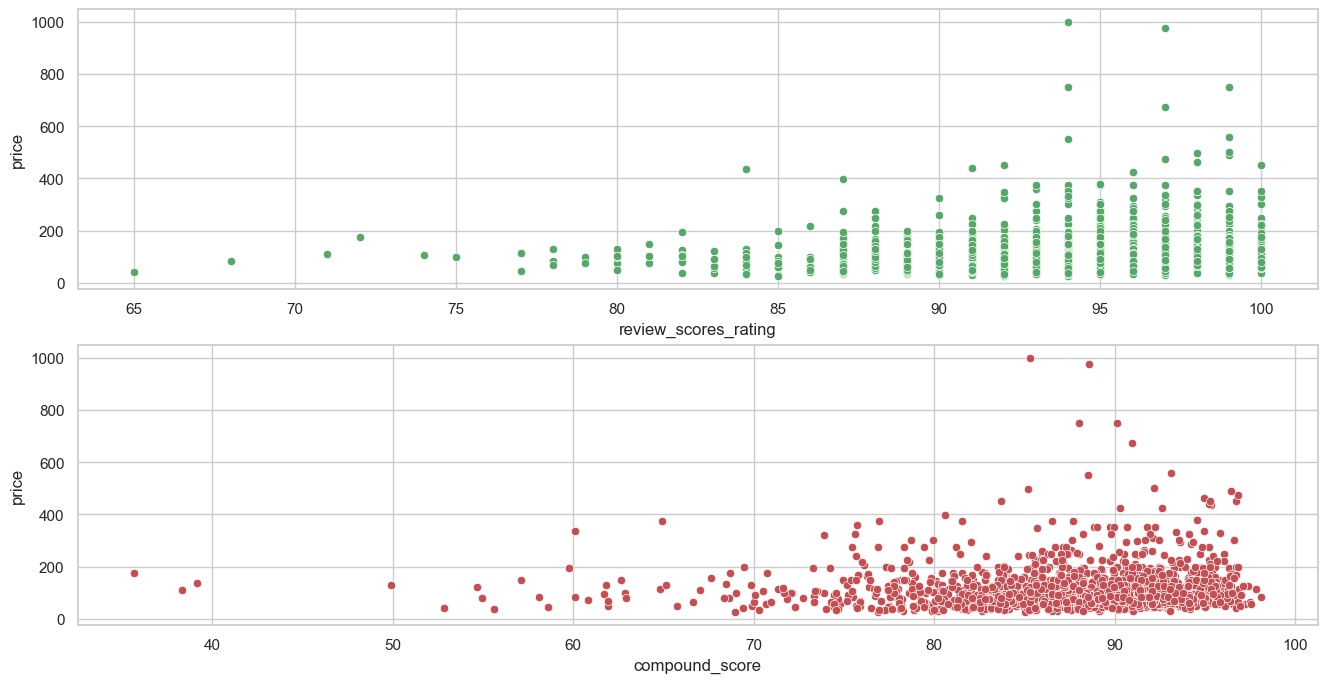

In [66]:
# # Visualising review scores and price
# f, axes = plt.subplots(2, 1, figsize=(16, 8))
# sb.scatterplot("review_scores_rating","price",ax = axes[0], data = merged_score,color = 'g')
# sb.scatterplot("compound_score","price",ax = axes[1], data = merged_score,color = 'r')

# Visualizing review scores and price
f, axes = plt.subplots(2, 1, figsize=(16, 8))
sb.scatterplot(x="review_scores_rating", y="price", ax=axes[0], data=merged_score, color='g')
sb.scatterplot(x="compound_score", y="price", ax=axes[1], data=merged_score, color='r')


#### Identifying anomalies using Nearest Neighbors
We will be attempting to fit a linear regression model to visualise if there is any positive relationship between compound_score and price. But before so, its quite clear that some of these data points are anomalies, we will be using nearest neighbors to filter them out

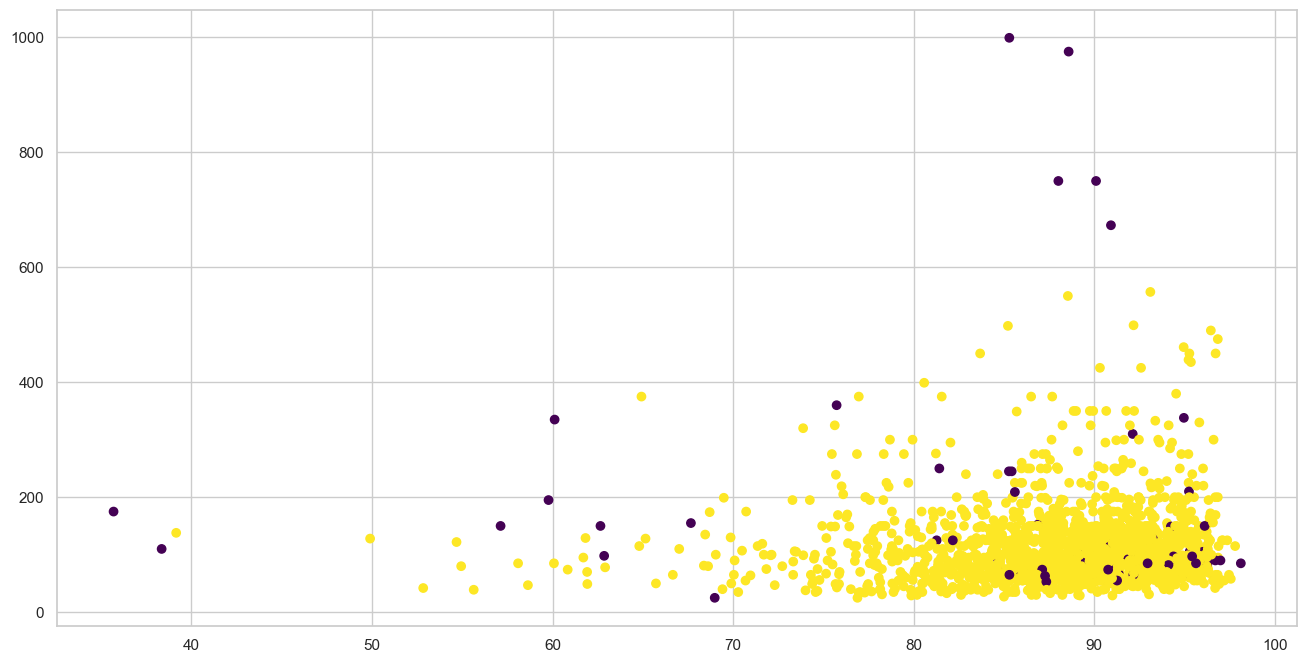

In [67]:
# Import LocalOutlierFactor from sklearn.neighbors
from sklearn.neighbors import LocalOutlierFactor

# Extract the Features from the Data
X = pd.DataFrame(merged_score[["compound_score", "price"]])

# Set the Parameters for Neighborhood
num_neighbors = 5      # Number of Neighbors
cont_fraction = 0.05    # Fraction of Anomalies with respect to the total data

# Create Anomaly Detection Model using LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors = num_neighbors, contamination = cont_fraction)

# Fit the Model on the Data and Predict Anomalies.
# Predict a label anomaly
lof.fit(X)
# Visualize the Anomalies in the Data
# Predict the Anomalies
# lof is local oultier factor
labels = lof.fit_predict(X)

# Append Labels to the Data
X_labeled_Anomaly = X.copy()
X_labeled_Anomaly["Anomaly"] = pd.Categorical(labels)
f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "compound_score", y = "price",c ='Anomaly', cmap = 'viridis', data = X_labeled_Anomaly)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12132\3631180869.py:10: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



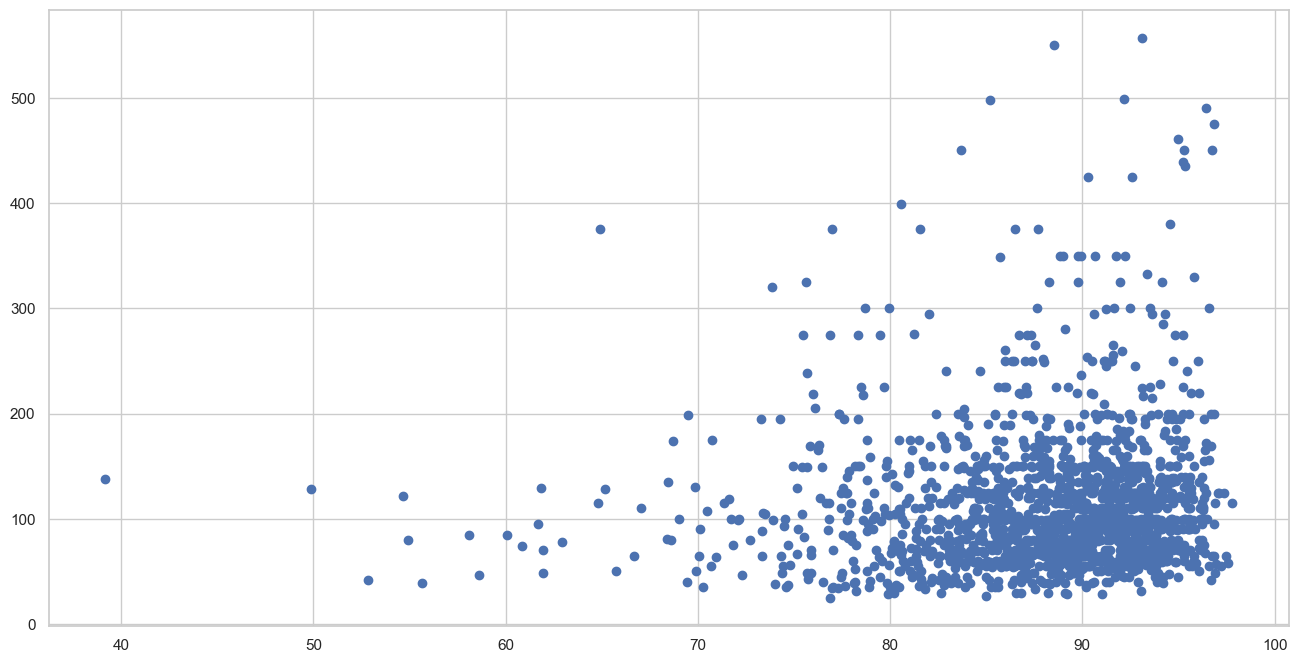

In [68]:
# Iterate through the rows and find which are the anomalies
for index,row in X_labeled_Anomaly.iterrows():
    # -1 are all the anomalies
    if row["Anomaly"] == -1:
        # Drop all the anomalies to "clean the data"
        X_labeled_Anomaly = X_labeled_Anomaly.drop(index)

# Plot the "Cleaned" data for visualization
f, axes = plt.subplots(1, 1, figsize=(16,8))        
plt.scatter(x = "compound_score", y = "price", cmap = 'viridis', data = X_labeled_Anomaly)

#### Fitting a linear regression model for future predictions
Now that we have removed the anomalies, we will fit a linear regression model to visualise any relationship between compound score and price

Intercept of Regression 	: b =  46.48912008258178
Coefficients of Regression 	: a =  [0.76459279]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.005376512173768888
Mean Squared Error (MSE) 	: 4404.482787651404



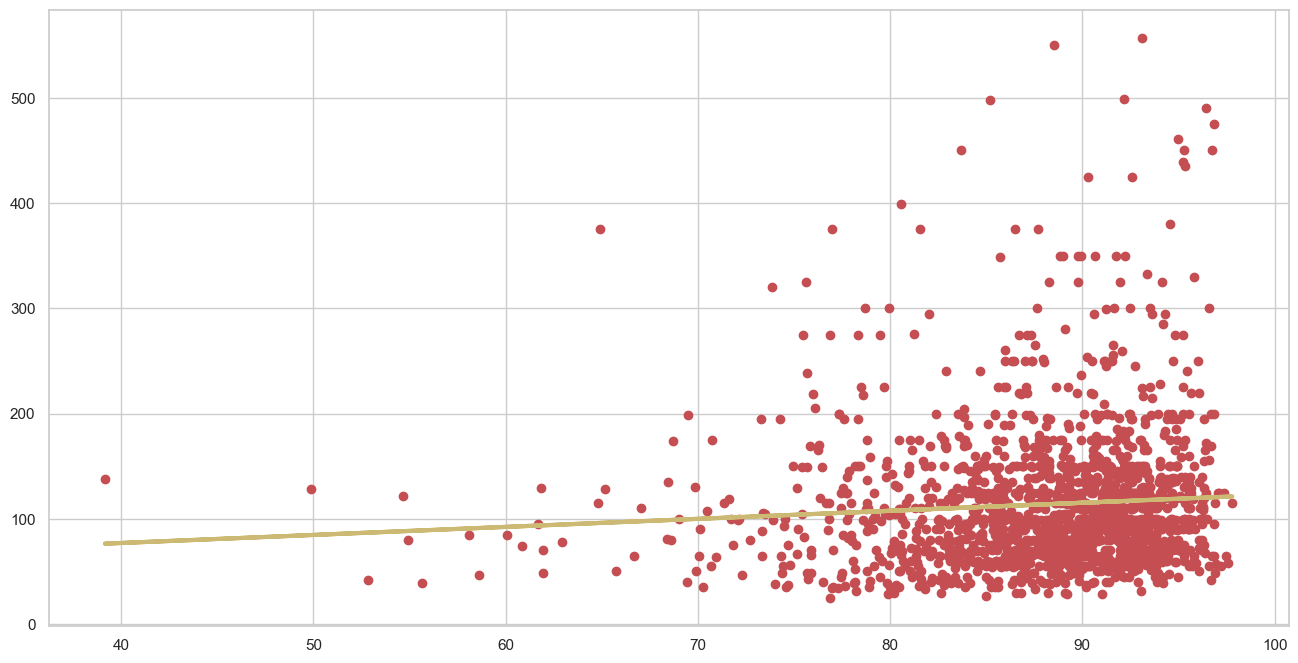

In [69]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

xdata = X_labeled_Anomaly[["compound_score"]]
ydata = X_labeled_Anomaly["price"]

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(xdata, ydata)        # train the linear regression model


# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()
# Predict Total values corresponding to HP
y_pred = linreg.predict(xdata)
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(xdata, ydata))
print("Mean Squared Error (MSE) \t:", mean_squared_error(ydata, y_pred))
print()
# Formula for the Regression line
regline_x = X_labeled_Anomaly["compound_score"]
regline_y = linreg.intercept_ + linreg.coef_ * xdata

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(xdata, ydata, color = 'r')
plt.plot(regline_x, regline_y, 'y-', linewidth = 3)
plt.show()

While at first glance, it seems that the higher the review score the higher the price. However, after fitting a linear regression model, we can see that this positive relationship is lesser than we would expect.

In conclusion, reviews only have a limited influence with pricing, although it is a positive one.

### NLP

#### Understanding Customer Experience

1. The aim is to find any way to improve the customer experience. It may not be necessary to improve the customer experience in the entire city of Seattle, but improving it in some way, be that through promotional offers or implementing new features is the primary goal.

(http:/https://www.kaggle.com/code/commit/understanding-customer-experience)

In [70]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [71]:
listings.shape

(3818, 93)

There are too many columns to print out, however we can see that there are some long descriptive text columns such as name, summary, space, description and neighborhood_overview. Descriptive text data is difficult to extract insight from as it is relying on a computer understanding a human language. We could spend extra effort implementing NLP to build more features from these columns, but it may not be worthwhile.

We can see that many columns appear to be a boolean type, such as requires_licence, instant_bookable, require_guest_profile_picture and require_guest_phone_verification. These would be easy to encode into 1s and 0s in order to implement into a training dataset.

There are some date columns such as last_scraped. These are currently stored as the "object" type, but they are in fact dates. The last_scraped column is a system column, so we should not use it for this analysis, but we should watch out for date columns that could be used to create features from.

In [72]:
cols = ['number_of_reviews', 'first_review', 'last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 
       'review_scores_location', 'review_scores_value', 'reviews_per_month']
listings[cols].describe()

,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
count,3818.000000,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,3191.000000
mean,22.223415,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,2.078919
std,37.730892,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,1.822348
min,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,0.020000
25%,2.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,0.695000
50%,9.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.540000
75%,26.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,3.000000
max,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,12.150000


<Axes: >

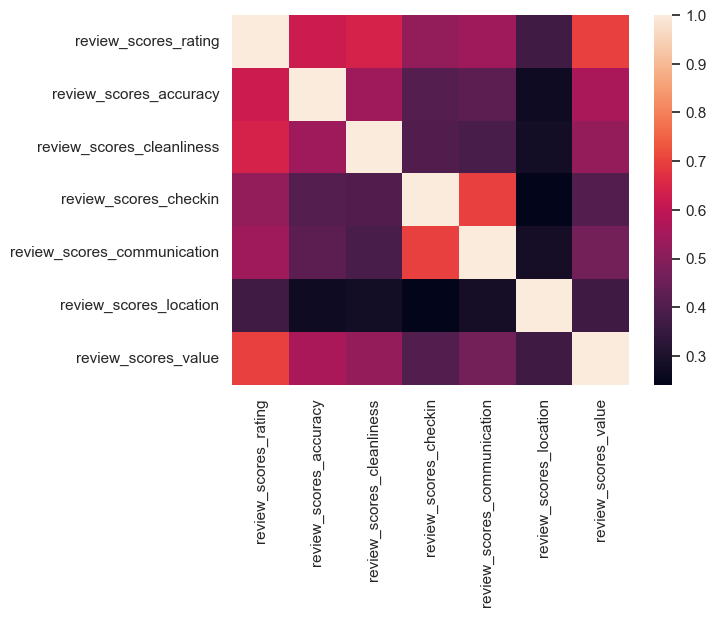

In [73]:
cols = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 
        'review_scores_communication', 'review_scores_location', 'review_scores_value']
df = listings[cols]

import seaborn as sns
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

Although the colour scheme in the above heatmap is quite dramatic, we can see that all the correlations are positive. We can see that many columns correlate strongly with review_scores_rating, except for especially review_scores_location. The columns review_scores_checkin and review_scores_communication are also highly correlated.

These columns are useful for answering our first data mining question:

Can we find an appropriate metric for understanding the quality of guests' experience?
Since review_scores_rating is probably the main column used for assessing the quality of guests' stays, we will first consider this variable for our customer experience metric.

We have established that 3,171 out of 3,818 values are not empty for this column, which is a fill rate of 83%. This is not too high, but given that this is such a direct path to customer experience, this is necessary for us to consider.



<Axes: >

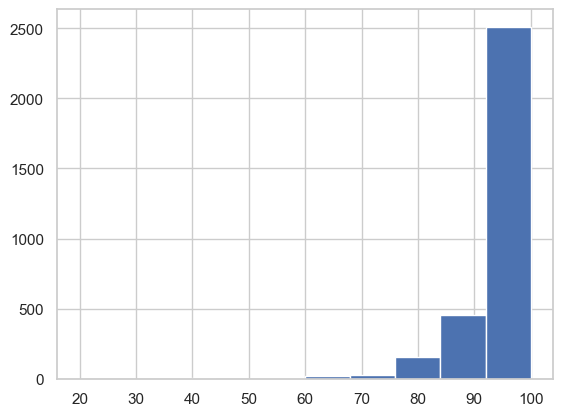

In [74]:
listings['review_scores_rating'].hist()

We have quite a heavily skewed distribution towards the maximum value of 100. This makes some sense as people will generally want to give nice reviews and are unlikely to give harsh ones unless there is a good reason to do so. Also, hosts would want to keep their review rating as high as possible as this is a beneficial advertisement draw for guests.

In [75]:
cols = ['number_of_reviews', 'first_review', 'last_review', 'reviews_per_month']
listings[cols].head()

,number_of_reviews,first_review,last_review,reviews_per_month
0,207,2011-11-01,2016-01-02,4.07
1,43,2013-08-19,2015-12-29,1.48
2,20,2014-07-30,2015-09-03,1.15
3,0,NaN,NaN,NaN
4,38,2012-07-10,2015-10-24,0.89


We have the total number of reviews made for a listing, the dates corresponding to the first time a review was made, and the last time a review was made, and the calculated reviews per month.

array([[<Axes: title={'center': 'number_of_reviews'}>,
        <Axes: title={'center': 'reviews_per_month'}>]], dtype=object)

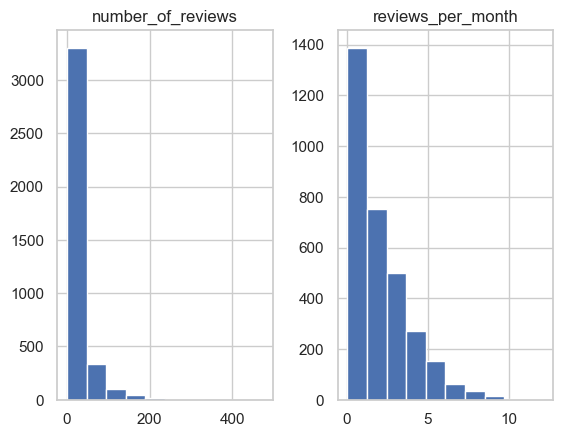

In [76]:
listings[['number_of_reviews', 'reviews_per_month']].hist()

The number_of_reviews distribution is mostly contained within a relatively small range compared to the overall range of values, whereas the reviews_per_month distribution is more uniformly contained within a much smaller range.

From a business standpoint, I am more interesed in the reviews_per_month metric as opposed to the number_of_reviews, since hosts can have a higher number of reviews just by being active for a longer time, and thus any strategy that targets boosting number of reviews would be biased towards more established hosts. Using reviews_per_month on the other hand would be applicable to all hosts. Also, a high number of reviews per month could contribute to the "magnitude" of the customer experience.

Combining metrics to find an appropriate response variable
From analysing the review-based features, two features in particular have stood out as good ingredients for a customer experience metric:

review_scores_rating
reviews_per_month
These two metrics from a business perspective represent two different aspects of customer experience: the review score reflects the quality of the guest's stay (i.e. how "good" or "bad" it was), and the reviews per month reflects how many customers' experiences were affected. Both are important for understanding the experience.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12132\2553870431.py:10: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared.



array([[<Axes: title={'center': 'review_scores_rating'}>,
        <Axes: title={'center': 'reviews_per_month'}>,
        <Axes: title={'center': 'cx_score'}>]], dtype=object)

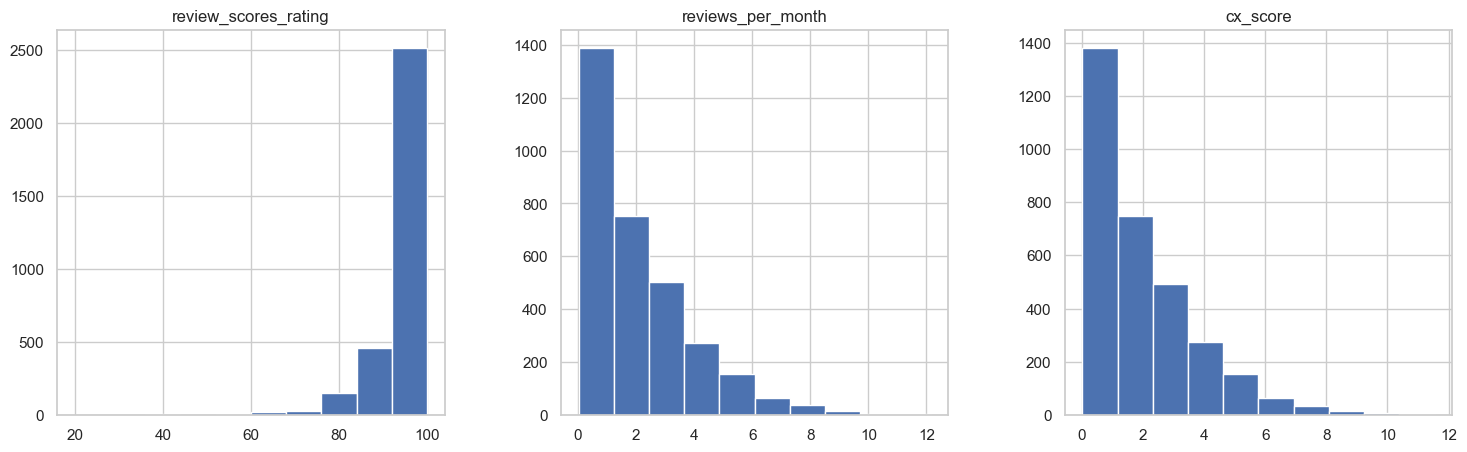

In [77]:
df = listings[['review_scores_rating', 'reviews_per_month']].copy()

df['cx_score'] = df['review_scores_rating'] / 100 * df['reviews_per_month']

import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize = (18,5))
ax = fig.gca()
df.hist(layout=(1,3), ax=ax)

We can see that the cx_score distribution is very similar in shape to the reviews_per_month distribution. This would appear to be because most of the review_scores_rating values are close to 100, which would mean a multiplicative factor of almost 1.0 to most reviews_per_month values.

<Axes: >

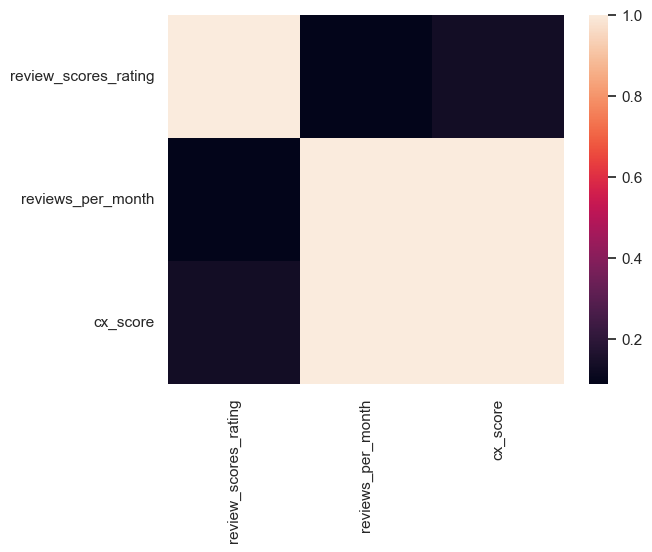

In [78]:
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

The close similiarity between cx_score and reviews_per_month, contrasted with the low correlation with these variables and review_scores_rating, is demonstrated by the above correlation matrix.

This in effect reduces the influence of review_scores_rating as opposed to the reviews_per_month. I am considering this to be OK because this essentially means we are mainly considering the "velocity of good reviews" as the CX score. It just so happens that there aren't that many "bad" reviews in the dataset.

- To summarise, after studying the review-based features, we have decided on a response variable for CX score consisting of multiplying the scaled review_scores_rating with reviews_per_month

>Attributes of property listed
property_type
room_type
accommodates
bathrooms
bedrooms
beds
bed_type
amenities
square_feet

The remainder of the data understanding will largely be attributed towards understanding our second data mining goal, which is to assess how listing attributes are linked with the customer experiences. We will continue through the feature groups, with this sub-section studying the property attribute features.

In [79]:
cols = ['property_type', 'room_type', 'accommodates', 'bathrooms', 'beds', 'bed_type', 'amenities', 'square_feet']
listings[cols].head()

,property_type,room_type,accommodates,bathrooms,beds,bed_type,amenities,square_feet
0,Apartment,Entire home/apt,4,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""Air Conditioning"",Kitchen,Heating,""Family/Kid Friendly"",Washer,Dryer}",NaN
1,Apartment,Entire home/apt,4,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free Parking on Premises"",""Buzzer/Wireless Intercom"",Heating,""Family/Kid Friendly"",Washer,Dryer,""Smoke Detector"",""Carbon Monoxide Detector"",""First Aid Kit"",""Safety Card"",""Fire Extinguisher"",Essentials}",NaN
2,House,Entire home/apt,11,4.5,7.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""Air Conditioning"",Kitchen,""Free Parking on Premises"",""Pets Allowed"",""Pets live on this property"",Dog(s),Cat(s),""Hot Tub"",""Indoor Fireplace"",Heating,""Family/Kid Friendly"",Washer,Dryer,""Smoke Detector"",""Carbon Monoxide Detector"",Essentials,Shampoo}",NaN
3,Apartment,Entire home/apt,3,1.0,2.0,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Indoor Fireplace"",Heating,""Family/Kid Friendly"",Washer,Dryer,""Smoke Detector"",""Carbon Monoxide Detector"",""Safety Card"",""Fire Extinguisher"",Essentials,Shampoo}",NaN
4,House,Entire home/apt,6,2.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Kitchen,Heating,""Family/Kid Friendly"",""Smoke Detector"",""Carbon Monoxide Detector"",""First Aid Kit"",""Fire Extinguisher"",Essentials,Shampoo}",NaN


In [80]:
listings['room_type'].value_counts()

room_type
Entire home/apt    2541
Private room       1160
Shared room         117
Name: count, dtype: int64

The room_type column has fewer unique values and would not need further grouping. It makes sense that the majority of the listings would be for the entire place.

<Axes: xlabel='longitude', ylabel='latitude'>

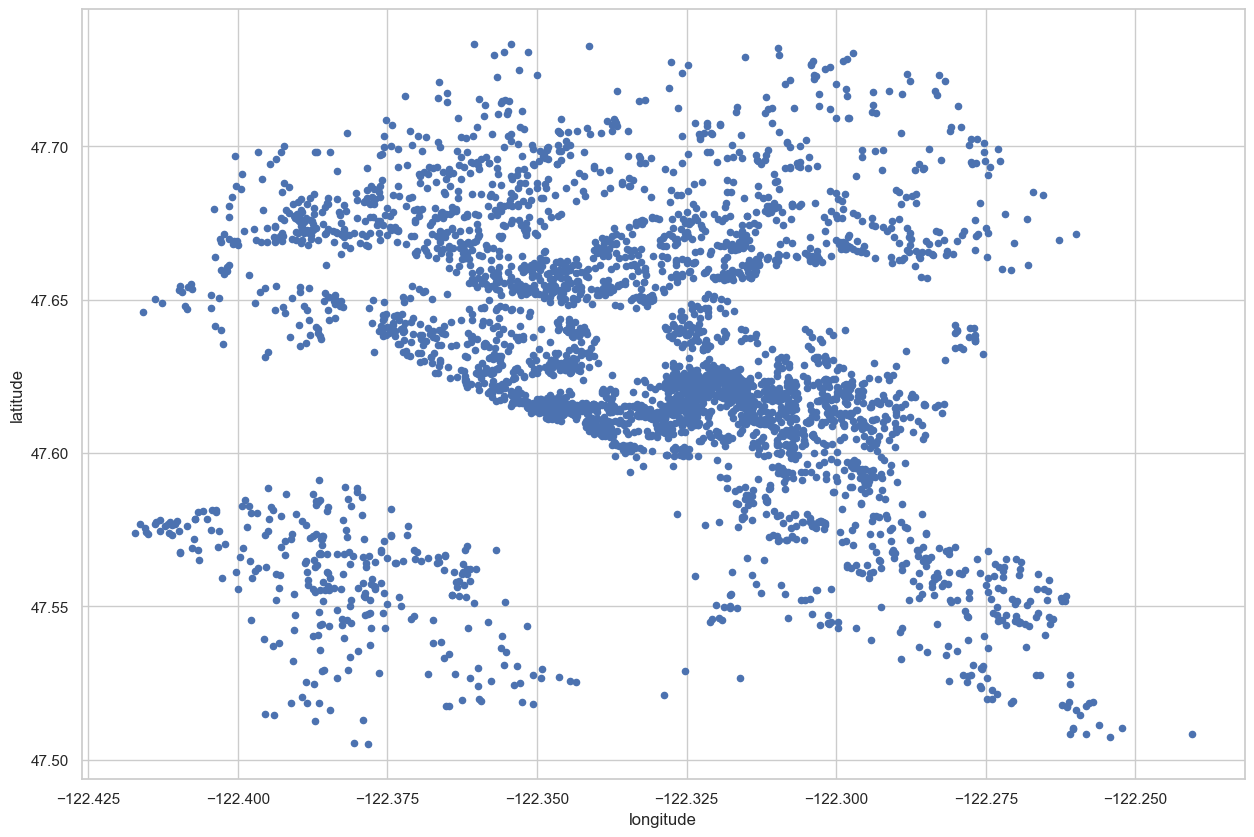

In [81]:
fig = plt.figure(figsize = (15,10))
ax = fig.gca()
listings.plot.scatter('longitude', 'latitude', ax=ax)

Busiest Time of the Year and Price Changes:

In [83]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,Neighborhood
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,"Make your self at home in this charming one-bedroom apartment, centrally-located on the west side of Queen Anne hill. This elegantly-decorated, completely private apartment (bottom unit of a duplex) has an open floor plan, bamboo floors, a fully equipped kitchen, a TV, DVD player, basic cable, and a very cozy bedroom with a queen-size bed. The unit sleeps up to four (two in the bedroom and ...","Make your self at home in this charming one-bedroom apartment, centrally-located on the west side of Queen Anne hill. This elegantly-decorated, completely private apartment (bottom unit of a duplex) has an open floor plan, bamboo floors, a fully equipped kitchen, a TV, DVD player, basic cable, and a very cozy bedroom with a queen-size bed. The unit sleeps up to four (two in the bedroom and ...",none,NaN,...,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07,Queen Anne
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,"Chemically sensitive? We've removed the irritants triggering allergy or asthma attacks, like carpeting, forced air & used pillows, all culprits that harbor fungus, mold & bacteria. No smoking, no pets. Designed for healthy living, so breathe easy.","Beautiful, hypoallergenic apartment in an extremely safe, quiet and pedestrian-friendly section of Queen Anne. A leafy-green location that puts the best of Seattle at your doorstep. Free WiFi, free parking, ...even free pillows! What's special about this place? Hypo-allergenic bedding, mattresses/covers and new pillows with each rental. (So feel free to take your new pillows with you!) A be...","Chemically sensitive? We've removed the irritants triggering allergy or asthma attacks, like carpeting, forced air & used pillows, all culprits that harbor fungus, mold & bacteria. No smoking, no pets. Designed for healthy living, so breathe easy. Beautiful, hypoallergenic apartment in an extremely safe, quiet and pedestrian-friendly section of Queen Anne. A leafy-green location that puts t...",none,"Queen Anne is a wonderful, truly functional village. You can walk everywhere... for coffee, for groceries, for a night out, for breathtaking views of the Puget Sound.",...,f,NaN,WASHINGTON,f,strict,t,t,6,1.48,Queen Anne
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,"New modern house built in 2013. Spectacular sunset/water views and light, rooftop deck and lounge area, hot tub, 5 bedrooms, gourmet kitchen. Perfect for 2-3 families, walk to downtown. Located in highly desirable Queen Anne neighborhood.","Our house is modern, light and fresh with a warm simple palette accented with barnwood, steel and concrete. Open living spaces for entertaining, gourmet kitchen, deck off the kitchen, reading nook, half bath and smaller tv room off kitchen. Fireplace with sofa and sitting area. Basement room is great for kids...this room has patio access and a garage door that opens into the space with baske...","New modern house built in 2013. Spectacular sunset/water views and light, rooftop deck and lounge area, hot tub, 5 bedrooms, gourmet kitchen. Perfect for 2-3 families, walk to downtown. Located in highly desirable Queen Anne neighborhood. Our house is modern, light and fresh with a warm simple palette accented with barnwood, steel and concrete. Open living spaces for entertaining, gourmet ...",none,"Upper Queen Anne is a charming neighborhood full of a mix of beautifully maintained, turn-of-the-century craftsman homes, tudors and modern homes. The ""main drag"" is Queen Anne 

In [84]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,year,month
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to everything!,2015,7
1,7202016,39087409,2015-07-20,32440555,Frank,"Kelly has a great room in a very central location. \r\nBeautiful building , architecture and a style that we really like. \r\nWe felt guite at home here and wish we had spent more time.\r\nWent for a walk and found Seattle Center with a major food festival in progress. What a treat.\r\nVisited the Space Needle and the Chihuly Glass exhibit. Then Pikes Place Market. WOW. Thanks for a great stay.",2015,7
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighborhood. This is the kind of apartment I wish I had!\r\n\r\nDidn't really get to meet Kelly until I was on my out, but she was always readily available by phone. \r\n\r\nI believe the only ""issue"" (if you want to call it that) was finding a place to park, but I sincerely doubt its easy to park anywhere in a residential area after 5 pm on a Friday",2015,7
3,7202016,40813543,2015-08-02,33671805,George,"Close to Seattle Center and all it has to offer - ballet, theater, museum, Space Needle, restaurants of all ilk just blocks away, and the Metropolitan (probably the coolest grocer you'll ever find). Easy to find and Kelly was warm, welcoming, and really interesting to talk to.",2015,8
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating in a great neighborhood. She has some great coffee and while I wasn't around much during my stay the time I spent interacting with her was very pleasant. \r\n\r\nThe apartment is in a great location and very close to the Seattle Center. The neighborhood itself has a lot of good food as well!,2015,8


In [85]:
calendar.head()

,listing_id,date,available,price,month,year
0,241032,2016-01-04,t,85.0,1,2016
1,241032,2016-01-05,t,85.0,1,2016
9,241032,2016-01-13,t,85.0,1,2016
10,241032,2016-01-14,t,85.0,1,2016
14,241032,2016-01-18,t,85.0,1,2016


In [96]:
# Group by month and calculate the average price
monthly_avg_price = reviews.groupby(reviews.index.month)['price'].mean()

# Plotting the average price per month
plt.figure(figsize=(10, 6))
monthly_avg_price.plot(kind='bar', color='skyblue')
plt.title('Average Price by Month')
plt.xlabel('Month')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=0)
plt.show()

AttributeError: 'RangeIndex' object has no attribute 'month'

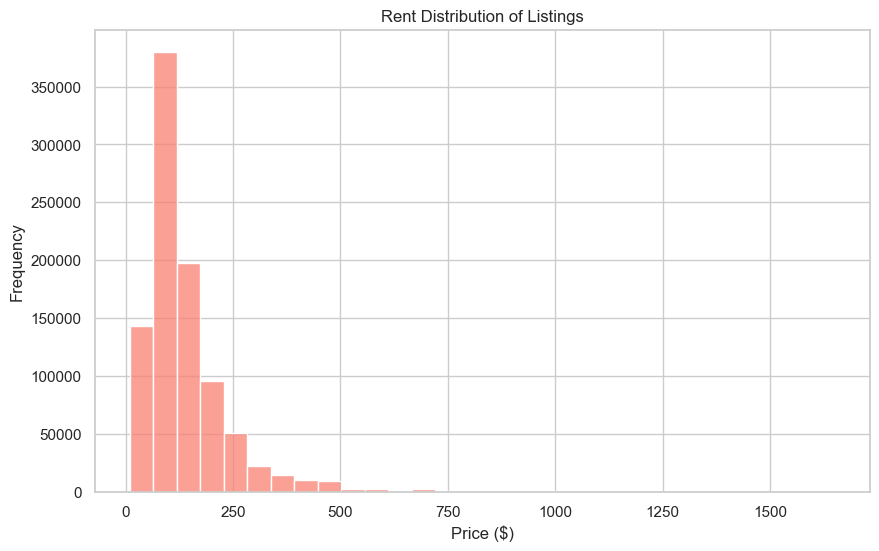

In [89]:
# Rent Distribution of Listings:
# Plotting the rent distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=calendar, x='price', bins=30, color='salmon')
plt.title('Rent Distribution of Listings')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()


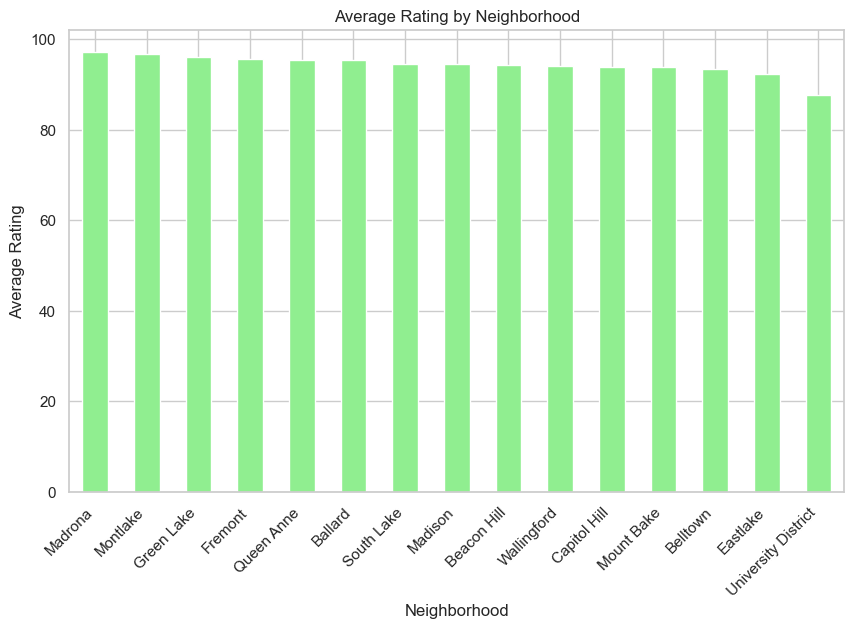

In [93]:
# Neighborhoods with the Highest Rating Review Scores:
# Group by neighborhood and calculate the average review_scores_rating
neighborhood_avg_rating = listings.groupby('Neighborhood')['review_scores_rating'].mean().sort_values(ascending=False)

# Plotting the average rating per neighborhood
plt.figure(figsize=(10, 6))
neighborhood_avg_rating.plot(kind='bar', color='lightgreen')
plt.title('Average Rating by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.show()


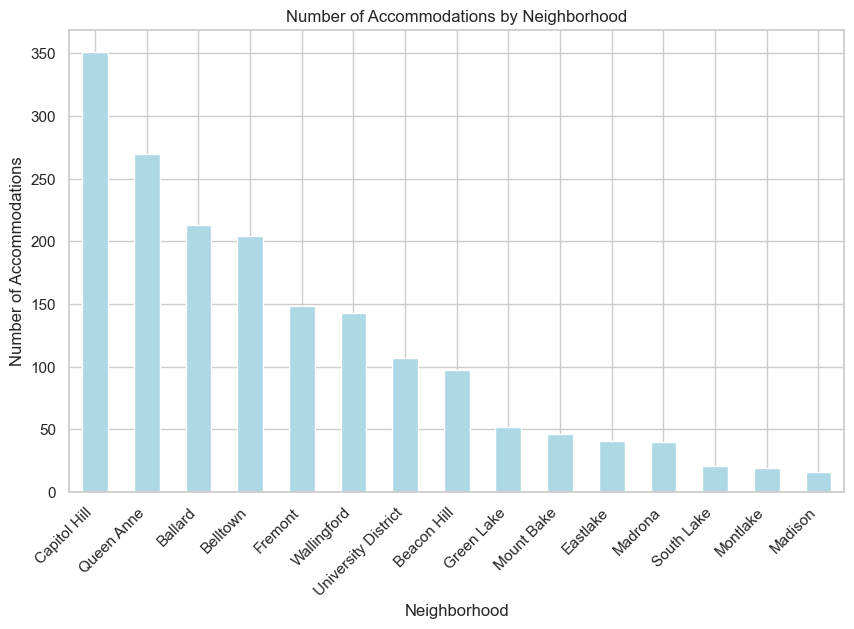

In [95]:
# Highest Number of Accommodations by Neighborhood:
# Count the number of accommodations per neighborhood
accommodation_count = listings['Neighborhood'].value_counts()

# Plotting the number of accommodations per neighborhood
plt.figure(figsize=(10, 6))
accommodation_count.plot(kind='bar', color='lightblue')
plt.title('Number of Accommodations by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Accommodations')
plt.xticks(rotation=45, ha='right')
plt.show()


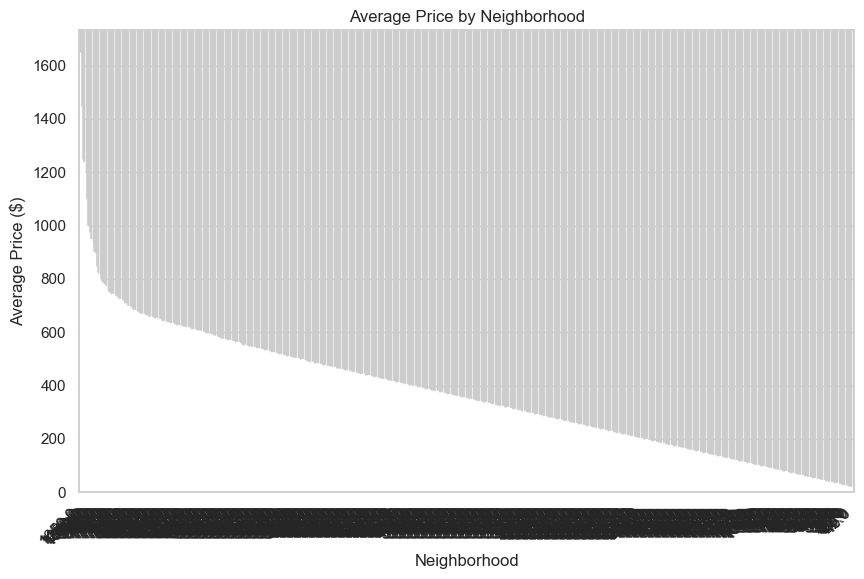

In [99]:
# Neighborhoods with the Highest Prices:
# Group by neighborhood and calculate the average price
neighborhood_avg_price = calendar.groupby('price')['price'].mean().sort_values(ascending=False)

# Plotting the average price per neighborhood
plt.figure(figsize=(10, 6))
neighborhood_avg_price.plot(kind='bar', color='orange')
plt.title('Average Price by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45, ha='right')
plt.show()


In [102]:
# Chill Neighborhood
# Filter reviews mentioning "chill" or "relaxed" in the comments
chill_reviews = reviews[reviews['comments'].str.contains('chill|relaxed', case=False)]

# Display the filtered reviews
print(chill_reviews[['neighborhood', 'comments']])


ValueError: Cannot mask with non-boolean array containing NA / NaN values

In [103]:
# Combine all guest reviews into a single string
all_comments = ' '.join(reviews['comments'])

# Generate a word cloud
wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(all_comments)

# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Guest Reviews')
plt.show()


TypeError: sequence item 11034: expected str instance, float found